## 1. import libraries

In [2]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

In [ ]:
## 2. Load data

In [2]:
dfgreen = pd.read_csv('slcd_mrgd_innerNEWin.csv')
dfgreen.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree
0,357,TA,TA03,Amstel III deel A/B Noord,T,202406,4,4,0,0,4,100,100,4764,Amstel III deel A/B Noord,2,97,7.81,800491.96,21.57,389875.81,53.47,35637.61,4.45,4.77,9.22,44.25,354238.20,11.49,5.16,6.33
1,376,TF,TF02,Grunder/Koningshoef,T,202406,425,416,24,0,440,98,104,4793,Grunder/Koningshoef,1,14500,8.65,131388.59,25.10,57838.37,48.60,4731.01,3.60,4.58,8.18,40.42,53107.36,9.41,4.66,4.75
2,577,EK,EK03,Jan Maijenbuurt,E,202409-202410,260,251,0,0,251,97,97,4527,Jan Maijenbuurt,1,29359,0.00,78222.90,36.31,25461.52,39.48,1009.53,1.29,6.93,8.22,31.26,24451.99,18.84,4.49,14.35
3,1542,KK,KK04,Scheldebuurt Oost,K,202502-202503,512,497,5,0,502,97,98,4575,Scheldebuurt Oost,1,16775,0.00,140439.17,24.95,51886.30,51.37,5780.15,4.12,14.42,18.54,32.83,46106.16,28.17,6.13,22.04
4,545,EB,EB08,Zeeheldenbuurt,E,202409-202410,212,205,7,0,212,97,100,4422,Zeeheldenbuurt,1,22444,12.65,103570.96,30.98,37724.84,41.64,410.40,0.40,5.21,5.61,36.03,37314.44,11.54,2.91,8.63


In [ ]:
## 2.1 Parking pressure file and basic cleaning

In [3]:
#preparing the OLS with one regressor
# 1) Add constant
X = dfgreen[['perc_publ_totalgreen']]
X = sm.add_constant(X)
y = dfgreen['Netto_PKD']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     30.22
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           7.02e-08
Time:                        16:43:34   Log-Likelihood:                -1767.6
No. Observations:                 389   AIC:                             3539.
Df Residuals:                     387   BIC:                             3547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   73.5233 

In [ ]:
# # Histogram
# histogram = sns.displot(df['a_vrouw'], kde=False)
# histogram.set(title='Women', xlabel='Number of Women', ylabel='Frequency')


In [ ]:
# #Kernel Density Plot
# kdp = sns.kdeplot(df['a_vrouw'], fill=True, clip=(0, None))
# kdp.set(title='Women', xlabel='Area code', ylabel='Density')

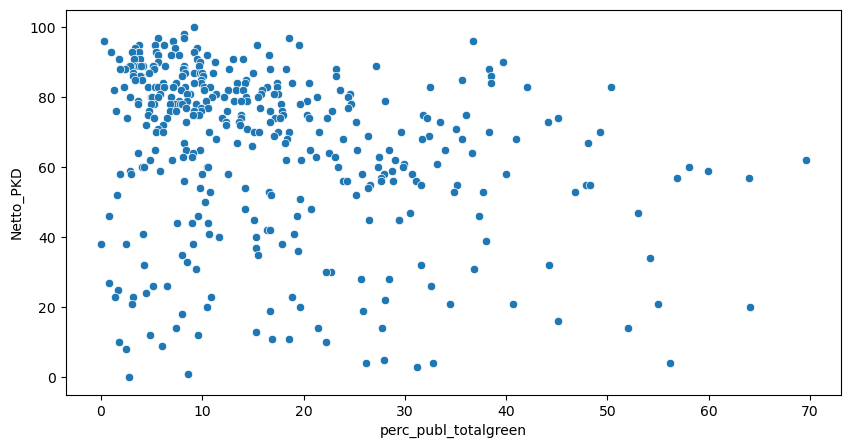

In [4]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_publ_totalgreen', y='Netto_PKD', data=dfgreen, ax=ax);

In [5]:
dfpp = pd.read_csv('VKPARKEREN_R-2023-buurten.csv')
dfpp.head()

,Year,Geography,Code,Name,Parking facilities (1-10)
0,2005,buurten,AA02,Westelijke eilanden,5.9
1,2005,buurten,AA05,Haarlemmerbuurt-West,5.5
2,2005,buurten,AA06,Haarlemmerbuurt-Oost,5.0
3,2005,buurten,AB02,Driehoekbuurt,4.6
4,2005,buurten,AB07,Bloemgrachtbuurt,4.5


In [6]:
dfgp = pd.read_csv('ORGROEN_R-2023-buurten.csv')
dfgp.head()

,Year,Geography,Code,Name,Green spaces (1-10)
0,2019,buurten,AA02,Westelijke eilanden,6.9
1,2019,buurten,AA03,Westerdokseiland,5.8
2,2019,buurten,AA05,Haarlemmerbuurt-West,6.3
3,2019,buurten,AA06,Haarlemmerbuurt-Oost,5.6
4,2019,buurten,AB01,Marnixbuurt-Noord,6.9


In [7]:
#merging both databases as inner, to keep only the matched items
dfgrpp = pd.merge(dfgreen, dfpp, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfgrpp = dfgrpp.sort_values(by=['BRT_code'], ascending=[True])
dfgrpp.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year,Geography,Code,Name,Parking facilities (1-10)
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307.0,Planciusbuurt Noord,1.0,19296.0,26.14,24209.19,20.10,9131.32,42.44,139.07,0.57,4.73,5.30,37.14,8992.26,8.10,1.48,6.62,NaN,NaN,NaN,NaN,NaN
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2005.0,buurten,AA02,Westelijke eilanden,5.9
2,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2007.0,buurten,AA02,Westelijke eilanden,5.2
3,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2009.0,buurten,AA02,Westelijke eilanden,6.1
4,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2011.0,buurten,AA02,Westelijke eilanden,5.9
5,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2013.0,buurten,AA02,Westelijke eilanden,5.4
6,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2015.0,buurten,AA02,Westelijke eilanden,6.0
7,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2017.0,buurten,AA02,Westelijke eilanden,5.8
8,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9
9,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6


In [8]:
#merging both databases as inner, to keep only the matched items
dfgrpp = pd.merge(dfgrpp, dfgp, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfgrpp = dfgrpp.sort_values(by=['BRT_code'], ascending=[True])
dfgrpp.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x,Geography_x,Code_x,Name_x,Parking facilities (1-10),Year_y,Geography_y,Code_y,Name_y,Green spaces (1-10)
0,117.0,AA,AA01,Planciusbuurt Noord,A,202403-202404,55.0,52.0,3.0,0.0,55.0,95.0,100.0,4307.0,Planciusbuurt Noord,1.0,19296.0,26.14,24209.19,20.10,9131.32,42.44,139.07,0.57,4.73,5.30,37.14,8992.26,8.10,1.48,6.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
29,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
28,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9
27,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9
26,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1
25,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2019.0,buurten,AA02,Westelijke eilanden,6.9
24,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
23,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
22,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.10,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9


In [9]:
dfgrppd = dfgrpp.dropna(subset=['Parking facilities (1-10)', 'Green spaces (1-10)'])
dfgrppd.head()

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x,Geography_x,Code_x,Name_x,Parking facilities (1-10),Year_y,Geography_y,Code_y,Name_y,Green spaces (1-10)
30,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9
29,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1
28,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9
27,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9
26,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1


In [10]:
dfgrppm = dfgrpp['Parking facilities (1-10)'] = dfgrpp['Parking facilities (1-10)'].fillna(dfgrpp['Parking facilities (1-10)'].mean())
dfgrppm.head()

0     6.296947
30    5.900000
29    5.900000
28    5.900000
27    5.600000
Name: Parking facilities (1-10), dtype: float64

In [11]:
dfgrppm['Green spaces (1-10)'] = dfgrppm['Green spaces (1-10)'].fillna(dfgrppm['Green spaces (1-10)'].mean())
dfgrppm.head()

KeyError: 'Green spaces (1-10)'

In [13]:
dfgrppm['Green spaces (1-10)'].dtype

KeyError: 'Green spaces (1-10)'

In [14]:
non_floats = dfgrppm[~dfgrppm['Green spaces (1-10)'].apply(lambda x: isinstance(x, float))]
print(non_floats)

KeyError: 'Green spaces (1-10)'

In [15]:
print(dfgrppm.columns.tolist())

AttributeError: 'Series' object has no attribute 'columns'

In [16]:
## regression with inner df for parking perception against real data
#preparing the OLS with one regressor
# 1) Add constant
X = dfgrppd[['Parking facilities (1-10)']]
X = sm.add_constant(X)
y = dfgrppd['Netto_PKD']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     845.8
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.38e-175
Time:                        17:32:04   Log-Likelihood:                -28533.
No. Observations:                6955   AIC:                         5.707e+04
Df Residuals:                    6953   BIC:                         5.708e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

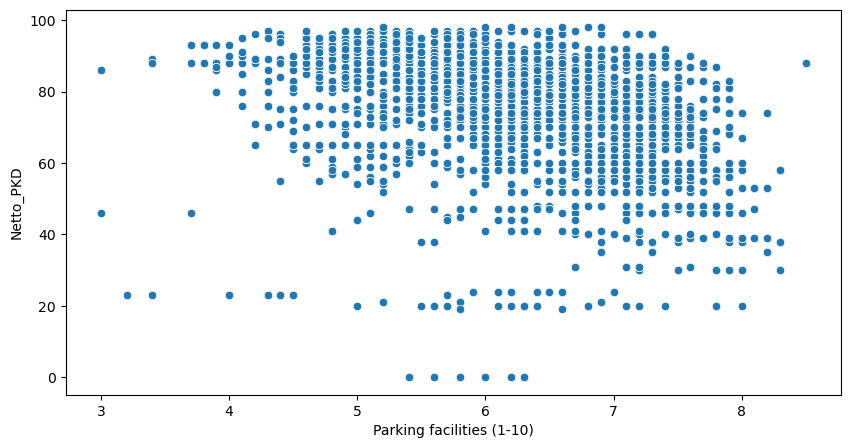

In [17]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Parking facilities (1-10)', y='Netto_PKD', data=dfgrppd, ax=ax);

In [18]:
## regression with inner df for green perception against real data
#preparing the OLS with one regressor
# 1) Add constant
X = dfgrppd[['Green spaces (1-10)']]
X = sm.add_constant(X)
y = dfgrppd['perc_publ_totalgreen']

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_publ_totalgreen   R-squared:                       0.233
Model:                              OLS   Adj. R-squared:                  0.233
Method:                   Least Squares   F-statistic:                     2115.
Date:                  Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                          17:34:20   Log-Likelihood:                -26015.
No. Observations:                  6955   AIC:                         5.203e+04
Df Residuals:                      6953   BIC:                         5.205e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

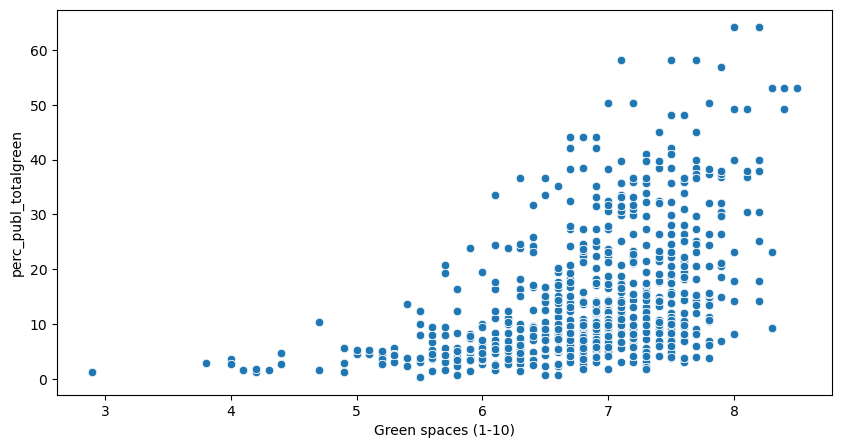

In [19]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='Green spaces (1-10)', y='perc_publ_totalgreen', data=dfgrppd, ax=ax);

In [20]:
#running the multiple regression again
#the accronym means "features multiple regression 1"
featsmr1 = ['perc_publ_totalgreen',
            'Green spaces (1-10)'].copy()
X_multi = sm.add_constant(dfgrppd[featsmr1])
y = dfgrppd['Netto_PKD']

model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     377.9
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.65e-156
Time:                        18:55:13   Log-Likelihood:                -28573.
No. Observations:                6955   AIC:                         5.715e+04
Df Residuals:                    6952   BIC:                         5.717e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.3697 

In [21]:
import geopandas as gpd

In [23]:
#this variable means "data frame neighborhoods polygons"
dfnpg = gpd.read_file('buurt_gegeneraliseerd.geojson')
dfnpg.head()

,fid,statcode,jrstatcode,statnaam,gm_code,rubriek,geometry
0,1,BU00340101,2023BU00340101,Centrum Haven Noord,GM0034,buurt,"MULTIPOLYGON (((5.219 52.33949, 5.22193 52.338..."
1,2,BU00340102,2023BU00340102,Centrum Haven Zuid,GM0034,buurt,"MULTIPOLYGON (((5.22224 52.33666, 5.22228 52.3..."
2,3,BU00340201,2023BU00340201,Rozenwerf en Tuinderswerf,GM0034,buurt,"MULTIPOLYGON (((5.22794 52.34173, 5.23055 52.3..."
3,4,BU00340202,2023BU00340202,Achterwerf,GM0034,buurt,"MULTIPOLYGON (((5.23249 52.33879, 5.23187 52.3..."
4,5,BU00340203,2023BU00340203,Goedewerf en Wittewerf,GM0034,buurt,"MULTIPOLYGON (((5.23015 52.33922, 5.22755 52.3..."


In [24]:
#filter the data frame to only contain Amsterdam neighborhoods
dfnpgf = dfnpg[dfnpg['gm_code'] == 'GM0363']
dfnpgf.head()

,fid,statcode,jrstatcode,statnaam,gm_code,rubriek,geometry
9736,9737,BU0363AA01,2023BU0363AA01,Planciusbuurt-Noord,GM0363,buurt,"MULTIPOLYGON (((4.88611 52.38976, 4.88443 52.3..."
9737,9738,BU0363AA02,2023BU0363AA02,Westelijke eilanden,GM0363,buurt,"MULTIPOLYGON (((4.89054 52.38399, 4.89051 52.3..."
9738,9739,BU0363AA03,2023BU0363AA03,Westerdokseiland,GM0363,buurt,"MULTIPOLYGON (((4.8966 52.38724, 4.89913 52.38..."
9739,9740,BU0363AA04,2023BU0363AA04,Planciusbuurt-Zuid,GM0363,buurt,"MULTIPOLYGON (((4.88443 52.38726, 4.88428 52.3..."
9740,9741,BU0363AA05,2023BU0363AA05,Haarlemmerbuurt-West,GM0363,buurt,"MULTIPOLYGON (((4.89051 52.38395, 4.88879 52.3..."


In [27]:
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
#to keep track of all the files uploaded, this one will be "green only data base" (godb)
fngodb = infodir + r'\data\green_only_db.csv'

#this variable means "data frame main source green"
dfmsg = pd.read_csv(fngodb)
#to verify
dfmsg.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,m2_publc_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,perc_trnsn_total,...,m2_publicnt,m2_publcnt_greennt,m2_built_envmt_green,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,7,GM0363,Amsterdam,BU03631306,4427,Westergasfabriek,1,-99999999,0,17.53,29.24,46.77,44776.51,99.999999,18.01,32.52,50.53,12.47,26504.03,255419.18,7.28,99685.39,68.27,10.31,1.67,...,23624.23,22530.18,0.0,18382.65,18382.65,0.0,4.67,4.67,74683.12,2719.53,199.06,5333.44,39.09,0.0,0.0,0.0,4022.37,130.2,4152.57,0.0,0.0,130.49,0.23,3.28,3.60
1,45,GM0363,Amsterdam,BU03634709,4552,Duivelseiland,1,23729,1385,0.33,5.07,5.40,202.57,100.000003,1.02,12.07,13.09,4.97,2920.45,61646.98,34.69,23080.23,42.51,17.82,0.00,...,7326.30,6901.11,0.0,20876.45,20876.45,0.0,0.00,0.00,3126.23,3662.17,514.10,141.05,82.16,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.46,4.27,8.62
2,53,GM0363,Amsterdam,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,2.09,8.52,10.61,2521.47,99.999996,3.60,18.73,22.33,4.55,4607.40,120651.50,32.67,38367.50,40.32,22.34,0.12,...,16418.25,14600.36,0.0,38507.74,38507.74,0.0,0.00,0.00,10281.06,10538.49,906.86,879.44,73.85,0.0,0.0,0.0,144.76,0.0,144.76,0.0,0.0,0.00,1.25,1.37,1.83
3,90,GM0363,Amsterdam,BU03635301,4579,IJselbuurt Oost,1,21880,2900,1.30,6.09,7.39,2078.39,99.999988,4.09,13.05,17.14,16.80,26146.56,159417.36,25.28,54516.32,40.28,17.55,0.10,...,18453.32,14043.27,21.8,39400.79,39378.99,0.0,0.00,0.00,9703.89,9513.20,901.93,631.04,66.47,0.0,0.0,0.0,109.68,8.4,118.08,0.0,0.0,32.23,0.03,0.68,9.48
4,92,GM0363,Amsterdam,BU03639303,4774,F-buurt,1,20169,4465,5.54,4.30,9.84,12907.19,100.000004,5.96,5.11,11.07,6.38,14141.01,233166.41,24.11,121287.55,56.32,13.12,0.06,...,29592.01,28604.52,0.0,56080.41,56080.41,0.0,0.00,0.00,10036.16,1006.84,141.33,735.41,82.86,0.0,0.0,0.0,145.69,0.0,145.69,0.0,0.0,0.00,0.00,0.01,16.96


In [29]:
#team6 needs to look for matches to ease the process in merging both data bases
matches = set(dfmsg['ngbhd_name']) & set(dfnpgf['statnaam'])
num_matches = len(matches)
#to count the number of non-matching values:
num_nomatch = len(set(dfmsg['ngbhd_name']) | set(dfnpgf['statnaam'])) - num_matches

print(f'Number of matching values: {num_matches}')
print(f'Number of non-matching values: {num_nomatch}')

Number of matching values: 239
Number of non-matching values: 518


In [30]:
#this is to ID all elements in db1 that do not exist in db2
set(dfmsg['ngbhd_name']) - set(dfnpgf['statnaam'])

{'Aalsmeerwegbuurt Oost',
 'Aalsmeerwegbuurt West',
 'Amstel III deel A/B Noord',
 'Amstel III deel A/B Zuid',
 'Amstel III deel C/D Noord',
 'Amstel III deel C/D Zuid',
 'Amstelkwartier Noord',
 'Amstelkwartier West',
 'Amstelkwartier Zuid',
 'Anjeliersbuurt Noord',
 'Anjeliersbuurt Zuid',
 'Baanakkerspark Noord',
 'Baanakkerspark Zuid',
 'Banne Noordoost',
 'Banne Noordwest',
 'Banne Zuidoost',
 'Banne Zuidwest',
 'Bedrijvengebied Cruquiusweg',
 'Bedrijventerrein Hamerstraat',
 'Bedrijventerrein Sloterdijk I',
 'Bellamybuurt Noord',
 'Bellamybuurt Zuid',
 'Bijlmermuseum Noord',
 'Bijlmermuseum Zuid',
 'Bloemenbuurt Noord',
 'Bloemenbuurt Zuid',
 'Bretten Oost',
 'Bretten West',
 'Buiksloterdijk Oost',
 'Buiksloterdijk West',
 'Buiksloterham',
 'Buikslotermeer Noord',
 'Buitenveldert Midden Zuid',
 'Buitenveldert Oost Midden',
 'Buitenveldert West Midden',
 'Buitenveldert Zuidoost',
 'Buitenveldert Zuidwest',
 'Burgemeester Tellegenbuurt Oost',
 'Burgemeester Tellegenbuurt West',
 'Bu

In [31]:
#this is to ID all elements in db2 that do not exist in db1
set(dfnpgf['statnaam']) - set(dfmsg['ngbhd_name'])

{'Aalsmeerwegbuurt-Oost',
 'Aalsmeerwegbuurt-West',
 'Aetsveld-Noord',
 'Aetsveld-Zuid',
 'Aetsveldsepolder',
 'Ambonpleinbuurt',
 'Amstel III deel A/B-Noord',
 'Amstel III deel A/B-Zuid',
 'Amstel III deel C/D-Noord',
 'Amstel III deel C/D-Zuid',
 'Amstelkwartier-Noord',
 'Amstelkwartier-West',
 'Amstelkwartier-Zuid',
 'Anjeliersbuurt-Noord',
 'Anjeliersbuurt-Zuid',
 'Arondeusbuurt',
 'Baaibuurt-Oost',
 'Baaibuurt-West',
 'Bakemabuurt',
 'Banne-Noordoost',
 'Banne-Noordwest',
 'Banne-Zuidoost',
 'Banne-Zuidwest',
 'Bedrijventerrein Nijverheidslaan',
 'Bedrijventerrein Van Houten',
 'Bedrijventerrein-Noord Weesp',
 'Bellamybuurt-Noord',
 'Bellamybuurt-Zuid',
 'Bijlmermuseum-Noord',
 'Bijlmermuseum-Zuid',
 'Bloemenbuurt-Noord',
 'Bloemenbuurt-Zuid',
 'Botteskerkbuurt',
 'Bovendiep/Diemerpark',
 'Bretten-Oost',
 'Bretten-West',
 'Buiksloterdijk-Oost',
 'Buiksloterdijk-West',
 'Buiksloterham-Noord',
 'Buiksloterham-Zuid',
 'Buikslotermeer-Noord',
 'Buitenveldert-Oost-Midden',
 'Buitenveld

In [32]:
#team6 preparing the neighborhood names to fit more easily with the other data set
dfnpgf['statnaam'] = dfnpgf['statnaam'].str.replace('-', ' ', regex=False)
dfnpgf.head()

C:\ProgramData\anaconda3\envs\environment-gds24\lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,fid,statcode,jrstatcode,statnaam,gm_code,rubriek,geometry
9736,9737,BU0363AA01,2023BU0363AA01,Planciusbuurt Noord,GM0363,buurt,"MULTIPOLYGON (((4.88611 52.38976, 4.88443 52.3..."
9737,9738,BU0363AA02,2023BU0363AA02,Westelijke eilanden,GM0363,buurt,"MULTIPOLYGON (((4.89054 52.38399, 4.89051 52.3..."
9738,9739,BU0363AA03,2023BU0363AA03,Westerdokseiland,GM0363,buurt,"MULTIPOLYGON (((4.8966 52.38724, 4.89913 52.38..."
9739,9740,BU0363AA04,2023BU0363AA04,Planciusbuurt Zuid,GM0363,buurt,"MULTIPOLYGON (((4.88443 52.38726, 4.88428 52.3..."
9740,9741,BU0363AA05,2023BU0363AA05,Haarlemmerbuurt West,GM0363,buurt,"MULTIPOLYGON (((4.89051 52.38395, 4.88879 52.3..."


In [33]:
#team6 preparing the neighborhood names to fit more easily with the other data set
dfmsg['ngbhd_name'] = dfmsg['ngbhd_name'].str.replace('-', ' ', regex=False)
dfmsg.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,m2_publc_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,perc_trnsn_total,...,m2_publicnt,m2_publcnt_greennt,m2_built_envmt_green,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,7,GM0363,Amsterdam,BU03631306,4427,Westergasfabriek,1,-99999999,0,17.53,29.24,46.77,44776.51,99.999999,18.01,32.52,50.53,12.47,26504.03,255419.18,7.28,99685.39,68.27,10.31,1.67,...,23624.23,22530.18,0.0,18382.65,18382.65,0.0,4.67,4.67,74683.12,2719.53,199.06,5333.44,39.09,0.0,0.0,0.0,4022.37,130.2,4152.57,0.0,0.0,130.49,0.23,3.28,3.60
1,45,GM0363,Amsterdam,BU03634709,4552,Duivelseiland,1,23729,1385,0.33,5.07,5.40,202.57,100.000003,1.02,12.07,13.09,4.97,2920.45,61646.98,34.69,23080.23,42.51,17.82,0.00,...,7326.30,6901.11,0.0,20876.45,20876.45,0.0,0.00,0.00,3126.23,3662.17,514.10,141.05,82.16,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.46,4.27,8.62
2,53,GM0363,Amsterdam,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,2.09,8.52,10.61,2521.47,99.999996,3.60,18.73,22.33,4.55,4607.40,120651.50,32.67,38367.50,40.32,22.34,0.12,...,16418.25,14600.36,0.0,38507.74,38507.74,0.0,0.00,0.00,10281.06,10538.49,906.86,879.44,73.85,0.0,0.0,0.0,144.76,0.0,144.76,0.0,0.0,0.00,1.25,1.37,1.83
3,90,GM0363,Amsterdam,BU03635301,4579,IJselbuurt Oost,1,21880,2900,1.30,6.09,7.39,2078.39,99.999988,4.09,13.05,17.14,16.80,26146.56,159417.36,25.28,54516.32,40.28,17.55,0.10,...,18453.32,14043.27,21.8,39400.79,39378.99,0.0,0.00,0.00,9703.89,9513.20,901.93,631.04,66.47,0.0,0.0,0.0,109.68,8.4,118.08,0.0,0.0,32.23,0.03,0.68,9.48
4,92,GM0363,Amsterdam,BU03639303,4774,F buurt,1,20169,4465,5.54,4.30,9.84,12907.19,100.000004,5.96,5.11,11.07,6.38,14141.01,233166.41,24.11,121287.55,56.32,13.12,0.06,...,29592.01,28604.52,0.0,56080.41,56080.41,0.0,0.00,0.00,10036.16,1006.84,141.33,735.41,82.86,0.0,0.0,0.0,145.69,0.0,145.69,0.0,0.0,0.00,0.00,0.01,16.96


In [34]:
#team6 needs to look for matches to ease the process in merging both data bases
matches = set(dfmsg['ngbhd_name']) & set(dfnpgf['statnaam'])
num_matches = len(matches)
#to count the number of non-matching values:
num_nomatch = len(set(dfmsg['ngbhd_name']) | set(dfnpgf['statnaam'])) - num_matches

print(f'Number of matching values: {num_matches}')
print(f'Number of non-matching values: {num_nomatch}')

Number of matching values: 407
Number of non-matching values: 182


In [35]:
#this is to ID all elements in db1 that do not exist in db2
set(dfmsg['ngbhd_name']) - set(dfnpgf['statnaam'])

{'Baanakkerspark Noord',
 'Baanakkerspark Zuid',
 'Bedrijvengebied Cruquiusweg',
 'Bedrijventerrein Hamerstraat',
 'Bedrijventerrein Sloterdijk I',
 'Buiksloterham',
 'Buitenveldert Midden Zuid',
 'Burgemeester Tellegenbuurt West',
 'Buurt 10',
 'Buurt 2',
 'Buurt 3',
 'Buurt 4 Oost',
 'Buurt 5 Noord',
 'Buurt 5 Zuid',
 'Buurt 6',
 'Buurt 7',
 'Buurt 8',
 'Buurt 9',
 'Coenhaven/Mercuriushaven',
 'Cornelis Douwesterrein',
 'De Heining',
 'De Punt',
 'Ecowijk',
 'Gaasperdam Noord',
 'Gaasperdam Zuid',
 'Gein Noordoost',
 'Gein Noordwest',
 'Gein Zuidoost',
 'Gein Zuidwest',
 'Gouden Bocht',
 'Haveneiland Noord',
 'Haveneiland Noordoost',
 'Haveneiland Noordwest',
 'Haveneiland Oost',
 'Haveneiland Zuidwest/Rieteiland West',
 'Jacques Veltmanbuurt',
 'Johannnes Vermeerbuurt',
 'K buurt Midden',
 'Louis Chrispijnbuurt',
 'Middeneiland Zuidoost',
 'Middeneiland Zuidwest',
 'Nieuwe Diep/Diemerpark',
 'Noordoostkwadrant Indische buurt',
 'Noordwestkwadrant Indische buurt Noord',
 'Noordwestkw

In [37]:
dfmsg_a = dfmsg.sort_values(by=['ngbhd_code'], ascending=[True])
dfmsg_a.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,m2_publc_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,perc_trnsn_total,...,m2_publicnt,m2_publcnt_greennt,m2_built_envmt_green,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
476,14205,GM0363,Amsterdam,BU03630000,4367,Kop Zeedijk,1,18119,1100,0.04,1.33,1.37,36.24,99.999994,0.17,2.38,2.55,26.23,20547.00,81028.45,42.20,21996.26,28.47,3.09,0.01,...,2400.91,2295.41,0.0,34152.82,34152.82,0.0,0.0,0.0,1074.44,103.61,38.95,708.23,72.09,0.0,0.0,0.0,6.23,0.0,6.23,0.0,0.0,0.00,0.40,0.52,0.70
285,8200,GM0363,Amsterdam,BU03630001,4368,Oude Kerk e.o.,1,8272,730,0.04,1.84,1.88,32.40,100.000009,0.19,2.93,3.12,4.14,3501.50,92544.84,61.07,23834.84,27.60,3.34,3.86,...,2567.97,2433.26,0.0,56357.71,56357.71,0.0,0.0,0.0,1698.59,516.91,157.39,335.85,93.11,0.0,0.0,0.0,3573.38,0.7,3574.08,0.0,0.0,0.00,0.33,0.77,1.11
45,1179,GM0363,Amsterdam,BU03630002,4322,Burgwallen Oost,1,25867,1610,0.15,3.39,3.54,107.83,100.000001,0.29,6.05,6.34,13.57,8506.35,72544.90,54.00,16288.92,25.84,5.06,1.53,...,3266.11,3201.99,27.1,39030.02,39002.92,0.0,0.0,0.0,2457.06,407.61,147.81,1336.65,81.93,0.0,0.0,0.0,1057.56,5.6,1063.16,0.0,0.0,41.21,0.00,0.00,0.00
28,798,GM0363,Amsterdam,BU03630003,4323,Nes e.o.,1,6565,350,0.03,0.93,0.96,19.60,99.999985,0.04,1.74,1.78,6.58,3451.74,57883.72,53.93,18964.57,33.69,2.24,3.55,...,1300.17,1291.67,0.0,31219.57,31219.57,0.0,0.0,0.0,536.01,0.56,0.00,357.68,92.25,0.0,0.0,0.0,1945.63,0.0,1945.63,0.0,0.0,107.79,0.10,0.02,0.09
79,2366,GM0363,Amsterdam,BU03630004,4326,BG terrein e.o.,1,7960,670,0.12,2.70,2.82,123.51,99.999994,0.82,6.71,7.53,17.08,15492.42,101869.85,47.73,21652.97,23.95,11.07,0.16,...,9370.55,8657.85,0.0,48486.67,48486.67,0.0,0.0,0.0,2752.27,1905.65,137.28,1909.93,77.25,0.0,0.0,0.0,22.02,0.1,22.12,0.0,0.0,139.99,2.24,3.67,3.80


In [45]:
#newests databases
#"buurten biking facilities"
dfbbf = pd.read_csv('2023_buurten_bike_fclts.csv')
dfbbf.head()

,Year,Geography,Code,Name,Parking facilities bikes (1-10)
0,2015,buurten,AA02,Westelijke eilanden,5.8
1,2015,buurten,AA03,Westerdokseiland,6.1
2,2015,buurten,AA05,Haarlemmerbuurt-West,4.8
3,2015,buurten,AA06,Haarlemmerbuurt-Oost,5.1
4,2015,buurten,AB01,Marnixbuurt-Noord,5.9


In [59]:
dfbbf[dfbbf['Year'] == ' 2023'].head(10)

,Year,Geography,Code,Name,Parking facilities bikes (1-10)


In [58]:
dfbbf['Year'].unique()[:10]

array([2015, 2017, 2019, 2021, 2023], dtype=int64)

In [61]:
dfbbf['Year'] = pd.to_numeric(dfbbf['Year'], errors='coerce')

In [62]:
dfbbf[dfbbf['Year'] == '2023'].head(10)

,Year,Geography,Code,Name,Parking facilities bikes (1-10)


In [60]:
print(dfbbf['Year'].dtype)
print(type(list_of_values[0]))

int64


NameError: name 'list_of_values' is not defined

In [53]:
#creating a variable to convert all the values in two columns into floats
dfbbf_ctc = ['Year', 'Parking facilities bikes (1-10)']
dfbbf[dfbbf_ctc] = dfbbf[dfbbf_ctc].apply(pd.to_numeric, errors= 'coerce')
dfbbf.head()

,Year,Geography,Code,Name,Parking facilities bikes (1-10)
0,2015,buurten,AA02,Westelijke eilanden,5.8
1,2015,buurten,AA03,Westerdokseiland,6.1
2,2015,buurten,AA05,Haarlemmerbuurt-West,4.8
3,2015,buurten,AA06,Haarlemmerbuurt-Oost,5.1
4,2015,buurten,AB01,Marnixbuurt-Noord,5.9


In [54]:
dfbbf[dfbbf['Year'] == '2023'].head(10)

,Year,Geography,Code,Name,Parking facilities bikes (1-10)


In [39]:
#newests databases
#"buurten singles"
dfsgl = pd.read_csv('2025_buurten_singles.csv')
dfsgl.head()

,Year,Geography,Code,Name,Households: % single-person
0,2010,buurten,AA01,Planciusbuurt-Noord,73.6
1,2010,buurten,AA02,Westelijke eilanden,59.3
2,2010,buurten,AA03,Westerdokseiland,46.1
3,2010,buurten,AA04,Planciusbuurt-Zuid,71.0
4,2010,buurten,AA05,Haarlemmerbuurt-West,61.9


In [63]:
dfsgl[dfsgl['Year'] == '2023'].head(10)

,Year,Geography,Code,Name,Households: % single-person


In [64]:
dfsgl['Year'].unique()[:10]

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [66]:
dfsgl[dfsgl['Year'] == ' 2019'].head(10)

,Year,Geography,Code,Name,Households: % single-person


In [40]:
#team6 needs to look for matches to ease the process in merging both data bases
mtch_ndb = set(dfbbf['Code']) & set(dfsgl['Code'])
num_mtch_ndb = len(mtch_ndb)
#to count the number of non-matching values:
num_nomtch_ndb = len(set(dfbbf['Code']) | set(dfsgl['Code'])) - num_mtch_ndb

print(f'Number of matching values: {num_mtch_ndb}')
print(f'Number of non-matching values: {num_nomtch_ndb}')

Number of matching values: 353
Number of non-matching values: 104


In [41]:
#merging both databases as outer, to keep all items
dfbksg = pd.merge(dfbbf, dfsgl, left_on='Code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfbksg.head(10)

,Year_x,Geography_x,Code,Name_x,Parking facilities bikes (1-10),Year_y,Geography_y,Name_y,Households: % single-person
0,NaN,NaN,AA01,NaN,NaN,2010,buurten,Planciusbuurt-Noord,73.6
1,NaN,NaN,AA01,NaN,NaN,2012,buurten,Planciusbuurt-Noord,76.2
2,NaN,NaN,AA01,NaN,NaN,2013,buurten,Planciusbuurt-Noord,76.6
3,NaN,NaN,AA01,NaN,NaN,2011,buurten,Planciusbuurt-Noord,76.5
4,NaN,NaN,AA01,NaN,NaN,2014,buurten,Planciusbuurt-Noord,72.6
5,NaN,NaN,AA01,NaN,NaN,2015,buurten,Planciusbuurt-Noord,75.5
6,NaN,NaN,AA01,NaN,NaN,2016,buurten,Planciusbuurt-Noord,71.7
7,NaN,NaN,AA01,NaN,NaN,2017,buurten,Planciusbuurt-Noord,69.9
8,NaN,NaN,AA01,NaN,NaN,2018,buurten,Planciusbuurt-Noord,68.2
9,NaN,NaN,AA01,NaN,NaN,2019,buurten,Planciusbuurt-Noord,73.5


In [42]:
dfbbff = dfbbf[dfbbf['Year'] == '2023']
dfbbff.head()

,Year,Geography,Code,Name,Parking facilities bikes (1-10)


In [ ]:
##for some weir reason, this wasn't working, so we cleaned the databases manually on excel
##to have only 1 year
## next we are uploading the new files with only 1 year

In [67]:
#newests databases
#"buurten biking facilities only 2023"
dfnbbf = pd.read_csv('2023_buurten_bike_fclts_cld.csv')
dfnbbf.head()

,Year,Geography,Code,Name,Parking facilities bikes (1-10)
0,2023,buurten,AA02,Westelijke eilanden,5.3
1,2023,buurten,AA03,Westerdokseiland,6.1
2,2023,buurten,AA05,Haarlemmerbuurt-West,5.1
3,2023,buurten,AA06,Haarlemmerbuurt-Oost,5.3
4,2023,buurten,AB01,Marnixbuurt-Noord,5.2


In [68]:
#newests databases
#"buurten singles only 2023"
dfnsgl = pd.read_csv('2025_buurten_singles_cld2023.csv')
dfnsgl.head()

,Year,Geography,Code,Name,Households: % single-person
0,2023,buurten,AA01,Planciusbuurt-Noord,74.1
1,2023,buurten,AA02,Westelijke eilanden,60.6
2,2023,buurten,AA03,Westerdokseiland,48.0
3,2023,buurten,AA04,Planciusbuurt-Zuid,76.8
4,2023,buurten,AA05,Haarlemmerbuurt-West,63.2


In [69]:
#merging both databases as outer, to keep all items
dfnbksg = pd.merge(dfnbbf, dfnsgl, left_on='Code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfnbksg.head(10)

,Year_x,Geography_x,Code,Name_x,Parking facilities bikes (1-10),Year_y,Geography_y,Name_y,Households: % single-person
0,NaN,NaN,AA01,NaN,NaN,2023.0,buurten,Planciusbuurt-Noord,74.1
1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
2,2023.0,buurten,AA03,Westerdokseiland,6.1,2023.0,buurten,Westerdokseiland,48.0
3,NaN,NaN,AA04,NaN,NaN,2023.0,buurten,Planciusbuurt-Zuid,76.8
4,2023.0,buurten,AA05,Haarlemmerbuurt-West,5.1,2023.0,buurten,Haarlemmerbuurt-West,63.2
5,2023.0,buurten,AA06,Haarlemmerbuurt-Oost,5.3,2023.0,buurten,Haarlemmerbuurt-Oost,64.8
6,2023.0,buurten,AB01,Marnixbuurt-Noord,5.2,2023.0,buurten,Marnixbuurt-Noord,63.8
7,2023.0,buurten,AB02,Driehoekbuurt,4.8,2023.0,buurten,Driehoekbuurt,67.3
8,2023.0,buurten,AB03,Anjeliersbuurt-Noord,4.6,2023.0,buurten,Anjeliersbuurt-Noord,62.0
9,NaN,NaN,AB04,NaN,NaN,2023.0,buurten,Zaagpoortbuurt,80.7


In [89]:
#exporting the cleansed file to merge with new data base 
dfnbksg.to_csv('nbhd_bk_sg.csv', index=False)

In [70]:
#merging both databases as outer, to keep all items
#"data base big with bikes and singles"
dfbwbs = pd.merge(dfgrppd, dfnbksg, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfbwbs.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x_x,Geography_x_x,Code_x,Name_x_x,Parking facilities (1-10),Year_y_x,Geography_y_x,Code_y,Name_y_x,Green spaces (1-10),Year_x_y,Geography_x_y,Code,Name_x_y,Parking facilities bikes (1-10),Year_y_y,Geography_y_y,Name_y_y,Households: % single-person
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA01,NaN,NaN,2023.0,buurten,Planciusbuurt-Noord,74.1
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
2,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
3,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
4,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
5,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
6,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
7,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
8,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
9,118.0,AA,AA02,Westelijke eilanden,

In [71]:
dfbwbsf = dfbwbs.dropna(subset=['Parking facilities bikes (1-10)'])
dfbwbsf.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x_x,Geography_x_x,Code_x,Name_x_x,Parking facilities (1-10),Year_y_x,Geography_y_x,Code_y,Name_y_x,Green spaces (1-10),Year_x_y,Geography_x_y,Code,Name_x_y,Parking facilities bikes (1-10),Year_y_y,Geography_y_y,Name_y_y,Households: % single-person
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
2,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
3,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
4,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
5,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
6,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
7,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
8,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
9,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,20

In [72]:
from statsmodels.multivariate.manova import MANOVA

In [75]:
# Example: multiple dependents
Y = dfbwbsf[['Netto_PKD', 'perc_publ_totalgreen']]
X = dfbwbsf[['Parking facilities bikes (1-10)', 'Households: % single-person', 'Green spaces (1-10)', 'Parking facilities (1-10)']]

# Statsmodels MANOVA
maov = MANOVA.from_formula(
    'Q("Netto_PKD") + Q("perc_publ_totalgreen") ~ Q("Parking facilities bikes (1-10)") + Q("Households: % single-person") + Q("Green spaces (1-10)") + Q("Parking facilities (1-10)")',
    data=dfbwbsf)
print(maov.mv_test())

                          Multivariate linear model
                                                                             
-------------------------------------------------------------------------------
            Intercept          Value    Num DF     Den DF     F Value    Pr > F
-------------------------------------------------------------------------------
               Wilks' lambda   0.6502   2.0000   6705.0000   1803.6975   0.0000
              Pillai's trace   0.3498   2.0000   6705.0000   1803.6975   0.0000
      Hotelling-Lawley trace   0.5380   2.0000   6705.0000   1803.6975   0.0000
         Roy's greatest root   0.5380   2.0000   6705.0000   1803.6975   0.0000
-----------------------------------------------------------------------------
                                                                             
-----------------------------------------------------------------------------
 Q("Parking facilities bikes (1-10)") Value  Num DF   Den DF  F Value  Pr > 

In [78]:
#running the multiple regression again
#the accronym means "features multiple regression 2"
featsmr2 = ['Parking facilities bikes (1-10)',
            'Households: % single-person',
            'Green spaces (1-10)',
            'Parking facilities (1-10)'].copy()
X_multi2 = sm.add_constant(dfbwbsf[featsmr2])
y2 = dfbwbsf['Netto_PKD']

model_multi2 = sm.OLS(y2, X_multi2).fit()
print(model_multi2.summary())

MissingDataError: exog contains inf or nans

In [79]:
X_multi2.isna().sum()  # Count NaNs per column

const                               0
Parking facilities bikes (1-10)     0
Households: % single-person         1
Green spaces (1-10)                67
Parking facilities (1-10)          67
dtype: int64

In [80]:
np.isinf(X_multi2).sum()

const                              0
Parking facilities bikes (1-10)    0
Households: % single-person        0
Green spaces (1-10)                0
Parking facilities (1-10)          0
dtype: int64

In [81]:
X_multi2 = X_multi2.fillna(X_multi2.mean())

In [82]:
model_multi2 = sm.OLS(y2, X_multi2).fit()
print(model_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                nan
Time:                        13:58:12   Log-Likelihood:                    nan
No. Observations:                6778   AIC:                               nan
Df Residuals:                    6773   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [83]:
dfbwbsf.head(10)

,OBJECTNUMMER,Wijken,BRT_code,BRT_name,SDC,Periode,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,perc_water_total,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,m2_publc_green,perc_public_green,perc_publc_tree,perc_publ_totalgreen,perc_public_greennt,m2_publc_greennt,perc_green,perc_low_green,perc_tree,Year_x_x,Geography_x_x,Code_x,Name_x_x,Parking facilities (1-10),Year_y_x,Geography_y_x,Code_y,Name_y_x,Green spaces (1-10),Year_x_y,Geography_x_y,Code,Name_x_y,Parking facilities bikes (1-10),Year_y_y,Geography_y_y,Name_y_y,Households: % single-person
1,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
2,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
3,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2023.0,buurten,AA02,Westelijke eilanden,5.9,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
4,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
5,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
6,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2021.0,buurten,AA02,Westelijke eilanden,5.6,2019.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
7,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,AA02,Westelijke eilanden,6.9,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
8,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,2021.0,buurten,AA02,Westelijke eilanden,7.1,2023.0,buurten,AA02,Westelijke eilanden,5.3,2023.0,buurten,Westelijke eilanden,60.6
9,118.0,AA,AA02,Westelijke eilanden,A,202403-202404,313.0,287.0,9.0,0.0,296.0,92.0,95.0,4306.0,Westelijke eilanden,1.0,19180.0,32.1,217246.57,29.43,44175.01,25.22,1650.34,0.76,4.89,5.65,19.57,42524.67,10.35,2.07,8.28,2019.0,buurten,AA02,Westelijke eilanden,5.9,20

In [84]:
X_multi2.isna().sum()  # Count NaNs per column

const                              0
Parking facilities bikes (1-10)    0
Households: % single-person        0
Green spaces (1-10)                0
Parking facilities (1-10)          0
dtype: int64

In [85]:
print(X_multi2.dtypes)
print(y2.dtypes)
print(X_multi2.shape, y2.shape)

const                              float64
Parking facilities bikes (1-10)    float64
Households: % single-person        float64
Green spaces (1-10)                float64
Parking facilities (1-10)          float64
dtype: object
float64
(6778, 5) (6778,)


In [86]:
X_multi2 = X_multi2.apply(pd.to_numeric, errors='coerce')
y2 = pd.to_numeric(y2, errors='coerce')

In [87]:
X_multi2 = X_multi2.replace([np.inf, -np.inf], np.nan).dropna()
y2 = y2.loc[X_multi2.index]

In [88]:
print(X_multi2.nunique())

const                                1
Parking facilities bikes (1-10)     33
Households: % single-person        223
Green spaces (1-10)                 45
Parking facilities (1-10)           52
dtype: int64


In [90]:
dfpp[dfpp['Year'] == '2023'].head(10)
dfpp.head()

,Year,Geography,Code,Name,Parking facilities (1-10)
0,2005,buurten,AA02,Westelijke eilanden,5.9
1,2005,buurten,AA05,Haarlemmerbuurt-West,5.5
2,2005,buurten,AA06,Haarlemmerbuurt-Oost,5.0
3,2005,buurten,AB02,Driehoekbuurt,4.6
4,2005,buurten,AB07,Bloemgrachtbuurt,4.5


In [91]:
#newests databases
#"buurten singles only 2023"
dfnpp = pd.read_csv('2023_buurten_parking_perception.csv')
dfnpp.head()

,Year,Geography,Code,Name,Parking facilities (1-10)
0,2023,buurten,AA02,Westelijke eilanden,5.9
1,2023,buurten,AA03,Westerdokseiland,6.7
2,2023,buurten,AA05,Haarlemmerbuurt-West,5.1
3,2023,buurten,AA06,Haarlemmerbuurt-Oost,5.2
4,2023,buurten,AB01,Marnixbuurt-Noord,5.8


In [92]:
#newests databases
#"buurten singles only 2023"
dfngp = pd.read_csv('2023_buurten_green_perception.csv')
dfngp.head()

,Year,Geography,Code,Name,Green spaces (1-10)
0,2023,buurten,AA02,Westelijke eilanden,6.9
1,2023,buurten,AA03,Westerdokseiland,6.6
2,2023,buurten,AA05,Haarlemmerbuurt-West,5.6
3,2023,buurten,AA06,Haarlemmerbuurt-Oost,5.7
4,2023,buurten,AB01,Marnixbuurt-Noord,6.7


In [93]:
#merging both databases as outer, to keep all items
#"data base big with bikes and singles"
dfnpgp = pd.merge(dfnpp, dfngp, left_on='Code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfnpgp.head(10)

,Year_x,Geography_x,Code,Name_x,Parking facilities (1-10),Year_y,Geography_y,Name_y,Green spaces (1-10)
0,2023.0,buurten,AA02,Westelijke eilanden,5.9,2023.0,buurten,Westelijke eilanden,6.9
1,2023.0,buurten,AA03,Westerdokseiland,6.7,2023.0,buurten,Westerdokseiland,6.6
2,2023.0,buurten,AA05,Haarlemmerbuurt-West,5.1,2023.0,buurten,Haarlemmerbuurt-West,5.6
3,2023.0,buurten,AA06,Haarlemmerbuurt-Oost,5.2,2023.0,buurten,Haarlemmerbuurt-Oost,5.7
4,2023.0,buurten,AB01,Marnixbuurt-Noord,5.8,2023.0,buurten,Marnixbuurt-Noord,6.7
5,2023.0,buurten,AB02,Driehoekbuurt,6.0,2023.0,buurten,Driehoekbuurt,5.7
6,2023.0,buurten,AB03,Anjeliersbuurt-Noord,6.1,2023.0,buurten,Anjeliersbuurt-Noord,5.9
7,2023.0,buurten,AB05,Anjeliersbuurt-Zuid,6.2,2023.0,buurten,Anjeliersbuurt-Zuid,5.8
8,2023.0,buurten,AB07,Bloemgrachtbuurt,4.7,2023.0,buurten,Bloemgrachtbuurt,5.5
9,2023.0,buurten,AB10,Elandsgrachtbuurt,5.5,2023.0,buurten,Elandsgrachtbuurt,5.3


In [94]:
#exporting the cleansed file to merge with new data base 
dfnpgp.to_csv('nbhd_npgp.csv', index=False)

In [95]:
#newests databases
#"buurten singles only 2023"
dfmbs = pd.read_csv('nbhd_bk_sg.csv')
dfmbs.head()

,Year_x,Geography_x,Code,Name_y,Parking facilities bikes (1-10),Households: % single-person
0,2023,buurten,AA01,Planciusbuurt-Noord,NaN,74.1
1,2023,buurten,AA02,Westelijke eilanden,5.3,60.6
2,2023,buurten,AA03,Westerdokseiland,6.1,48.0
3,2023,buurten,AA04,Planciusbuurt-Zuid,NaN,76.8
4,2023,buurten,AA05,Haarlemmerbuurt-West,5.1,63.2


In [96]:
#newests databases
#"buurten singles only 2023"
dfmpg = pd.read_csv('nbhd_npgp.csv')
dfmpg.head()

,Year_x,Geography_x,Code,Name_y,Parking facilities (1-10),Green spaces (1-10)
0,2023,buurten,AA02,Westelijke eilanden,5.9,6.9
1,2023,buurten,AA03,Westerdokseiland,6.7,6.6
2,2023,buurten,AA05,Haarlemmerbuurt-West,5.1,5.6
3,2023,buurten,AA06,Haarlemmerbuurt-Oost,5.2,5.7
4,2023,buurten,AB01,Marnixbuurt-Noord,5.8,6.7


In [97]:
#merging both databases as outer, to keep all items
#"data base big with bikes and singles"
dfindv = pd.merge(dfmbs, dfmpg, left_on='Code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfindv.head(10)

,Year_x_x,Geography_x_x,Code,Name_y_x,Parking facilities bikes (1-10),Households: % single-person,Year_x_y,Geography_x_y,Name_y_y,Parking facilities (1-10),Green spaces (1-10)
0,2023,buurten,AA01,Planciusbuurt-Noord,NaN,74.1,NaN,NaN,NaN,NaN,NaN
1,2023,buurten,AA02,Westelijke eilanden,5.3,60.6,2023.0,buurten,Westelijke eilanden,5.9,6.9
2,2023,buurten,AA03,Westerdokseiland,6.1,48.0,2023.0,buurten,Westerdokseiland,6.7,6.6
3,2023,buurten,AA04,Planciusbuurt-Zuid,NaN,76.8,NaN,NaN,NaN,NaN,NaN
4,2023,buurten,AA05,Haarlemmerbuurt-West,5.1,63.2,2023.0,buurten,Haarlemmerbuurt-West,5.1,5.6
5,2023,buurten,AA06,Haarlemmerbuurt-Oost,5.3,64.8,2023.0,buurten,Haarlemmerbuurt-Oost,5.2,5.7
6,2023,buurten,AB01,Marnixbuurt-Noord,5.2,63.8,2023.0,buurten,Marnixbuurt-Noord,5.8,6.7
7,2023,buurten,AB02,Driehoekbuurt,4.8,67.3,2023.0,buurten,Driehoekbuurt,6.0,5.7
8,2023,buurten,AB03,Anjeliersbuurt-Noord,4.6,62.0,2023.0,buurten,Anjeliersbuurt-Noord,6.1,5.9
9,2023,buurten,AB04,Zaagpoortbuurt,NaN,80.7,NaN,NaN,NaN,NaN,NaN


In [98]:
#exporting the cleansed file to merge with new data base 
dfindv.to_csv('nbhd_indv.csv', index=False)

In [99]:
#newests databases
#"independent variables saved"
dfivs = pd.read_csv('nbhd_indv.csv')
dfivs.head()

,Year_x_x,Geography_x_x,Code,Name_y_x,Parking facilities bikes (1-10),Households: % single-person,Parking facilities (1-10),Green spaces (1-10)
0,2023,buurten,AA01,Planciusbuurt-Noord,NaN,74.1,NaN,NaN
1,2023,buurten,AA02,Westelijke eilanden,5.3,60.6,5.9,6.9
2,2023,buurten,AA03,Westerdokseiland,6.1,48.0,6.7,6.6
3,2023,buurten,AA04,Planciusbuurt-Zuid,NaN,76.8,NaN,NaN
4,2023,buurten,AA05,Haarlemmerbuurt-West,5.1,63.2,5.1,5.6


In [100]:
#newests databases
#"neighborhood parking pressure"
dfnppr = pd.read_csv('nbhd_nc_ao_cld.csv')
dfnppr.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel
0,117,A,AA,AA01,Planciusbuurt Noord,55,52,3,0,55,95,100,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond
1,118,A,AA,AA02,Westelijke eilanden,313,287,9,0,296,92,95,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond
2,119,A,AA,AA03,Westerdokseiland,165,76,0,0,76,46,46,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond
3,120,A,AA,AA04,Planciusbuurt Zuid,20,15,1,0,16,75,80,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond
4,121,A,AA,AA05,Haarlemmerbuurt West,148,141,4,0,145,95,98,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond


In [101]:
#merging both databases as outer, to keep all items
#"data base big with bikes and singles"
dfbig = pd.merge(dfnppr, dfivs, left_on='BRT_code', right_on='Code', how='outer')
#this is to keep them sorted by their buurt code
dfbig.head(10)

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,Year_x_x,Geography_x_x,Code,Name_y_x,Parking facilities bikes (1-10),Households: % single-person,Parking facilities (1-10),Green spaces (1-10)
0,117.0,A,AA,AA01,Planciusbuurt Noord,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond,2023.0,buurten,AA01,Planciusbuurt-Noord,NaN,74.1,NaN,NaN
1,118.0,A,AA,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond,2023.0,buurten,AA02,Westelijke eilanden,5.3,60.6,5.9,6.9
2,119.0,A,AA,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond,2023.0,buurten,AA03,Westerdokseiland,6.1,48.0,6.7,6.6
3,120.0,A,AA,AA04,Planciusbuurt Zuid,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond,2023.0,buurten,AA04,Planciusbuurt-Zuid,NaN,76.8,NaN,NaN
4,121.0,A,AA,AA05,Haarlemmerbuurt West,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond,2023.0,buurten,AA05,Haarlemmerbuurt-West,5.1,63.2,5.1,5.6
5,122.0,A,AA,AA06,Haarlemmerbuurt Oost,121.0,110.0,1.0,0.0,111.0,91.0,92.0,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,202403-202404,doordeweeks avond,2023.0,buurten,AA06,Haarlemmerbuurt-Oost,5.3,64.8,5.2,5.7
6,123.0,A,AB,AB01,Marnixbuurt Noord,169.0,137.0,1.0,0.0,138.0,81.0,82.0,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,202403-202404,doordeweeks avond,2023.0,buurten,AB01,Marnixbuurt-Noord,5.2,63.8,5.8,6.7
7,124.0,A,AB,AB02,Driehoekbuurt,312.0,266.0,3.0,0.0,269.0,85.0,86.0,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958 4.88036...",4.884213,52.381615,202403-202404,doordeweeks avond,2023.0,buurten,AB02,Driehoekbuurt,4.8,67.3,6.0,5.7
8,125.0,A,AB,AB03,Anjeliersbuurt Noord,165.0,141.0,0.0,0.0,141.0,85.0,85.0,"POLYGON((4.8871229 52.3790942,4.8881601 52.380...","POLYGON((52.3790942 4.8871229,52.3802151 4.888...",4.883804,52.379197,202403-202404,doordeweeks avond,2023.0,buurten,AB03,Anjeliersbuurt-Noord,4.6,62.0,6.1,5.9
9,126.0,A,AB,AB04,Zaagpoortbuurt,158.0,85.0,2.0,0.0,87.0,54.0,55.0,"POLYGON((4.8791773 52.3777046,4.8786863 52.377...","POLYGON((52.3777046 4.8791773,52.3778162 4.878...",4.877343,52.376228,202403-202404,doordeweeks avond,2023.0,buurten,AB04,Zaagpoortbuurt,NaN,80.7,NaN,NaN


In [102]:
#exporting the cleansed file to merge with new data base 
dfbig.to_csv('holy_ish.csv', index=False)

In [103]:
#working with the almost final data base to create the regressions and scatter plots
##possible before the final merger
#"almost final"
dfaf = pd.read_csv('holy_ish.csv')
dfaf.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel
0,117.0,A,AA,AA01,Planciusbuurt Noord,2023,AA01,Planciusbuurt-Noord,55.0,52.0,3.0,0.0,55.0,100.0,95.0,NaN,74.1,NaN,NaN,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond
1,118.0,A,AA,AA02,Westelijke eilanden,2023,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond
2,119.0,A,AA,AA03,Westerdokseiland,2023,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond
3,120.0,A,AA,AA04,Planciusbuurt Zuid,2023,AA04,Planciusbuurt-Zuid,20.0,15.0,1.0,0.0,16.0,80.0,75.0,NaN,76.8,NaN,NaN,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond
4,121.0,A,AA,AA05,Haarlemmerbuurt West,2023,AA05,Haarlemmerbuurt-West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond


In [ ]:
##making sure we have all numeric values in the columns we are gonna work with
##filtering out all the NaN values for it to work better

In [104]:
cols_to_fix = [
    'Netto_PKD',
    'parking_facilities_bikes_1-10',
    'perc_single_person_households',
    'parking_facilities_1-10',
    'green_spaces_1-10'
]
dfaf[cols_to_fix] = dfaf[cols_to_fix].apply(pd.to_numeric, errors='coerce')

In [106]:
#replace infinite values and drop rows with NaNs
dfaf[cols_to_fix] = dfaf[cols_to_fix].replace([np.inf, -np.inf], np.nan)
dfaffil = dfaf.dropna(subset=cols_to_fix)

In [107]:
dfaffil[
    'Netto_PKD',
    'parking_facilities_bikes_1-10',
    'perc_single_person_households',
    'parking_facilities_1-10',
    'green_spaces_1-10'
].info()

KeyError: ('Netto_PKD', 'parking_facilities_bikes_1-10', 'perc_single_person_households', 'parking_facilities_1-10', 'green_spaces_1-10')

In [108]:
dfaffil.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel
1,118.0,A,AA,AA02,Westelijke eilanden,2023,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond
2,119.0,A,AA,AA03,Westerdokseiland,2023,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond
4,121.0,A,AA,AA05,Haarlemmerbuurt West,2023,AA05,Haarlemmerbuurt-West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond
5,122.0,A,AA,AA06,Haarlemmerbuurt Oost,2023,AA06,Haarlemmerbuurt-Oost,121.0,110.0,1.0,0.0,111.0,92.0,91.0,5.3,64.8,5.2,5.7,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,202403-202404,doordeweeks avond
6,123.0,A,AB,AB01,Marnixbuurt Noord,2023,AB01,Marnixbuurt-Noord,169.0,137.0,1.0,0.0,138.0,82.0,81.0,5.2,63.8,5.8,6.7,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,202403-202404,doordeweeks avond


In [109]:
#running the multiple regression for Parking pressure and all the variables
#the accronym means "features multiple regression holy #1"
fmrh1 = ['parking_facilities_bikes_1-10',
         'perc_single_person_households',
         'parking_facilities_1-10',
         'green_spaces_1-10'].copy()
X_multi3 = sm.add_constant(dfaffil[fmrh1])
y3 = dfaffil['Netto_PKD']

model_multi3 = sm.OLS(y3, X_multi3).fit()
print(model_multi3.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     18.94
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           6.59e-14
Time:                        19:54:02   Log-Likelihood:                -1251.8
No. Observations:                 306   AIC:                             2514.
Df Residuals:                     301   BIC:                             2532.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [110]:
#process to remove all '-' symbols from names to increase likelihood of matches when mergin both databases
dfaf['BRT_name'] = dfaf['BRT_name'].str.replace('-', ' ', regex=False)
dfaf['Name'] = dfaf['Name'].str.replace('-', ' ', regex=False)
dfaf.head(10)

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel
0,117.0,A,AA,AA01,Planciusbuurt Noord,2023,AA01,Planciusbuurt Noord,55.0,52.0,3.0,0.0,55.0,100.0,95.0,NaN,74.1,NaN,NaN,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond
1,118.0,A,AA,AA02,Westelijke eilanden,2023,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond
2,119.0,A,AA,AA03,Westerdokseiland,2023,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond
3,120.0,A,AA,AA04,Planciusbuurt Zuid,2023,AA04,Planciusbuurt Zuid,20.0,15.0,1.0,0.0,16.0,80.0,75.0,NaN,76.8,NaN,NaN,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond
4,121.0,A,AA,AA05,Haarlemmerbuurt West,2023,AA05,Haarlemmerbuurt West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond
5,122.0,A,AA,AA06,Haarlemmerbuurt Oost,2023,AA06,Haarlemmerbuurt Oost,121.0,110.0,1.0,0.0,111.0,92.0,91.0,5.3,64.8,5.2,5.7,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,202403-202404,doordeweeks avond
6,123.0,A,AB,AB01,Marnixbuurt Noord,2023,AB01,Marnixbuurt Noord,169.0,137.0,1.0,0.0,138.0,82.0,81.0,5.2,63.8,5.8,6.7,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,202403-202404,doordeweeks avond
7,124.0,A,AB,AB02,Driehoekbuurt,2023,AB02,Driehoekbuurt,312.0,266.0,3.0,0.0,269.0,86.0,85.0,4.8,67.3,6.0,5.7,"POLYGON((4.8829591 52.3836506,4.8803612 52.379...","POLYGON((52.3836506 4.8829591,52.37958 4.88036...",4.884213,52.381615,202403-202404,doordeweeks avond
8,125.0,A,AB,AB03,Anjeliersbuurt Noord,2023,AB03,Anjeliersbuurt Noord,165.0,141.0,0.0,0.0,141.0,85.0,85.0,4.6,62.0,6.1,5.9,"POLYGON((4.8871229 52.3790942,4.8881601 52.380...","POLYGON((52.3790942 4.8871229,52.3802151 4.888...",4.883804,52.379197,202403-202404,doordeweeks avond
9,126.0,A,AB,AB04,Zaagpoortbuurt,2023,AB04,Zaagpoortbuurt,158.0,85.0,2.0,0.0,87.0,55.0,54.0,NaN,80.7,NaN,NaN,"POLYGON((4.8791773 52.3777046,4.8786863 52.377...","POLYGON((52.3777046 4.8791773,52.3778162 4.878...",4.877343,52.376228,202403-202404,doordeweeks avond


In [112]:
#"green cleaned"
dfgc = pd.read_csv('green_only_db_cld.csv')
dfgc.head()

,OBJID,mnpty_code,mnpty_name,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,m2_publc_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_water_total,m2_water,m2_ngbhd,perc_built_envmt,m2_publc_space,perc_publc_space,perc_publcnt,perc_trnsn_total,...,m2_publicnt,m2_publcnt_greennt,m2_built_envmt_green,m2_built_envmt,m2_built_envmt_greennt,m2_green_other,m2_other_surfc,m2_other_greennt,m2_tree_publc,m2_tree_publcnt,m2_tree_built_envmt,m2_tree_water,perc_built_gray,m2_agrct_green,m2_agrct,m2_agrct_greennt,m2_trnsn_greennt,m2_green_trnsn,m2_trnsn,m2_agrct_tree,m2_tree_other,m2_tree_trnsn,perc_trnsn_tree,perc_trnsn_green,perc_trnsn_greennt
0,45,GM0363,Amsterdam,BU03634709,4552,Duivelseiland,1,23729,1385,0.33,5.07,5.40,202.57,100.000003,1.02,12.07,13.09,4.97,2920.45,61646.98,34.69,23080.23,42.51,17.82,0.00,...,7326.30,6901.11,0.0,20876.45,20876.45,0.0,0.0,0.0,3126.23,3662.17,514.10,141.05,82.16,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.46,4.27,8.62
1,53,GM0363,Amsterdam,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,2.09,8.52,10.61,2521.47,99.999996,3.60,18.73,22.33,4.55,4607.40,120651.50,32.67,38367.50,40.32,22.34,0.12,...,16418.25,14600.36,0.0,38507.74,38507.74,0.0,0.0,0.0,10281.06,10538.49,906.86,879.44,73.85,0.0,0.0,0.0,144.76,0.0,144.76,0.0,0.0,0.00,1.25,1.37,1.83
2,90,GM0363,Amsterdam,BU03635301,4579,IJselbuurt Oost,1,21880,2900,1.30,6.09,7.39,2078.39,99.999988,4.09,13.05,17.14,16.80,26146.56,159417.36,25.28,54516.32,40.28,17.55,0.10,...,18453.32,14043.27,21.8,39400.79,39378.99,0.0,0.0,0.0,9703.89,9513.20,901.93,631.04,66.47,0.0,0.0,0.0,109.68,8.4,118.08,0.0,0.0,32.23,0.03,0.68,9.48
3,92,GM0363,Amsterdam,BU03639303,4774,F-buurt,1,20169,4465,5.54,4.30,9.84,12907.19,100.000004,5.96,5.11,11.07,6.38,14141.01,233166.41,24.11,121287.55,56.32,13.12,0.06,...,29592.01,28604.52,0.0,56080.41,56080.41,0.0,0.0,0.0,10036.16,1006.84,141.33,735.41,82.86,0.0,0.0,0.0,145.69,0.0,145.69,0.0,0.0,0.00,0.00,0.01,16.96
4,118,GM0363,Amsterdam,BU03635300,4578,IJselbuurt West,1,19329,2390,2.88,14.50,17.38,3845.38,99.999988,5.42,21.39,26.81,7.15,8894.28,133355.16,26.85,47469.49,50.09,15.91,0.00,...,13660.70,10279.07,0.0,34801.70,34801.70,0.0,0.0,0.0,19332.39,7548.69,1003.84,644.07,66.52,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.01,0.22,0.15


In [113]:
#process to remove all '-' symbols from names to increase likelihood of matches when mergin both databases
dfgc['ngbhd_name'] = dfgc['ngbhd_name'].str.replace('-', ' ', regex=False)

In [114]:
gc_cols_to_fix = ['urbtn_indx_km2',
                  'pop_dnsty_km2',
                  'qty_inhbt',
                  'perc_public_green',
                  'perc_publc_tree',
                  'perc_total_pub_green',
                  'm2_publc_green',
                  'perc_built_area',
                  'perc_low_green',
                  'perc_tree',
                  'perc_green',
                  'perc_water_total',
                  'm2_water',
                  'm2_ngbhd',
                  'perc_built_envmt',
                  'm2_publc_space',
                  'perc_publc_space',
                  'perc_publcnt',
                  'perc_trnsn_total',
                  'perc_publcnt_tree',
                  'perc_publcnt_green',
                  'perc_publcnt_greennt',
                  'perc_other',
                  'perc_built_tree',
                  'perc_built_green',
                  'perc_built_greennt',
                  'perc_public_greennt',
                  'perc_other_tree',
                  'perc_other_green',
                  'perc_other_greennt',
                  'perc_water',
                  'perc_water_tree',
                  'm2_ngbhd_pls_agrct',
                  'm2_publc_greennt',
                  'm2_publicnt_green',
                  'm2_publicnt',
                  'm2_publcnt_greennt',
                  'm2_built_envmt_green',
                  'm2_built_envmt',
                  'm2_built_envmt_greennt',
                  'm2_green_other',
                  'm2_other_surfc',
                  'm2_other_greennt',
                  'm2_tree_publc',
                  'm2_tree_publcnt',
                  'm2_tree_built_envmt',
                  'm2_tree_water',
                  'perc_built_gray',
                  'm2_agrct_green',
                  'm2_agrct',
                  'm2_agrct_greennt',
                  'm2_trnsn_greennt',
                  'm2_green_trnsn',
                  'm2_trnsn',
                  'm2_agrct_tree',
                  'm2_tree_other',
                  'm2_tree_trnsn',
                  'perc_trnsn_tree',
                  'perc_trnsn_green',
                  'perc_trnsn_greennt']
dfgc[gc_cols_to_fix] = dfgc[gc_cols_to_fix].apply(pd.to_numeric, errors='coerce')

In [117]:
dfgcfil = dfgc[['OBJID',
    'ngbhd_code',
    'KVID',
    'ngbhd_name',
    'urbtn_indx_km2',
    'pop_dnsty_km2',
    'qty_inhbt',
    'perc_public_green',
    'perc_publc_tree',
    'perc_total_pub_green',
    'perc_built_area',
    'perc_low_green',
    'perc_tree',
    'perc_green',
    'perc_built_envmt',
    'perc_publc_space',
    'perc_publcnt',
    'perc_publcnt_tree',
    'perc_publcnt_green',
    'perc_publcnt_greennt',
    'perc_water']]
dfgcfil.head()

,OBJID,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water
0,45,BU03634709,4552,Duivelseiland,1,23729,1385,0.33,5.07,5.40,100.000003,1.02,12.07,13.09,34.69,42.51,17.82,5.94,0.69,11.19,4.74
1,53,BU03634600,4539,Valeriusbuurt Oost,1,12248,1405,2.09,8.52,10.61,99.999996,3.60,18.73,22.33,32.67,40.32,22.34,8.73,1.51,12.10,3.82
2,90,BU03635301,4579,IJselbuurt Oost,1,21880,2900,1.30,6.09,7.39,99.999988,4.09,13.05,17.14,25.28,40.28,17.55,5.97,2.77,8.81,16.40
3,92,BU03639303,4774,F buurt,1,20169,4465,5.54,4.30,9.84,100.000004,5.96,5.11,11.07,24.11,56.32,13.12,0.43,0.42,12.27,6.06
4,118,BU03635300,4578,IJselbuurt West,1,19329,2390,2.88,14.50,17.38,99.999988,5.42,21.39,26.81,26.85,50.09,15.91,5.66,2.54,7.71,6.67


In [118]:
#merging both databases as outer, to keep all items
#"data base everything plus green"
## Exact match on "BRT_name" (db1.E) == "ngbhd_name" 
mrgd_E = dfaf.merge(dfgcfil, left_on='BRT_name', right_on='ngbhd_name', how='outer', indicator=True)

In [120]:
#this is to keep them sorted by their buurt code
mrgd_E.sort_values(by=['BRT_code'], ascending=[False])
mrgd_E.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
0,360.0,T,TA,TA06,AMC,2023.0,TA06,AMC,21.0,3.0,1.0,0.0,4.0,19.0,14.0,NaN,NaN,NaN,NaN,"POLYGON((4.9617449 52.2953793,4.9611556 52.296...","POLYGON((52.2953793 4.9617449,52.2960124 4.961...",4.956929,52.293033,202406,doordeweeks avond,943.0,BU03639205,4769.0,AMC,3.0,43.0,30.0,5.29,22.47,27.76,100.000000,7.35,29.32,36.67,12.78,63.60,12.44,3.05,0.80,8.59,5.05,both
1,1498.0,K,KA,KA05,Aalsmeerwegbuurt Oost,2023.0,KA05,Aalsmeerwegbuurt Oost,545.0,480.0,0.0,0.0,480.0,88.0,88.0,5.8,54.2,6.8,6.5,"POLYGON((4.8523654 52.3509495,4.8517535 52.351...","POLYGON((52.3509495 4.8523654,52.3510245 4.851...",4.849003,52.348521,202502-202503,doordeweeks avond,2680.0,BU03634403,4534.0,Aalsmeerwegbuurt Oost,1.0,19568.0,2210.0,2.41,10.23,12.64,100.000007,4.68,15.43,20.11,28.40,47.06,18.36,3.96,2.25,12.15,4.45,both
2,1497.0,K,KA,KA04,Aalsmeerwegbuurt West,2023.0,KA04,Aalsmeerwegbuurt West,521.0,473.0,1.0,0.0,474.0,91.0,91.0,5.6,52.3,6.3,7.3,"POLYGON((4.8494407 52.3516047,4.8455507 52.351...","POLYGON((52.3516047 4.8494407,52.351581 4.8455...",4.847504,52.349202,202502-202503,doordeweeks avond,4916.0,BU03634402,4294.0,Aalsmeerwegbuurt West,1.0,25911.0,2535.0,1.69,12.33,14.02,100.000001,3.88,19.18,23.06,31.06,42.08,19.83,5.61,2.19,12.03,6.49,both
3,1786.0,S,SE,SE03,Aetsveld Noord,2023.0,SE03,Aetsveld Noord,766.0,588.0,27.0,0.0,615.0,80.0,77.0,4.8,30.9,5.6,6.6,"POLYGON((5.0469992 52.3015335,5.0468562 52.301...","POLYGON((52.3015335 5.0469992,52.3015888 5.046...",5.042458,52.300397,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1785.0,S,SE,SE02,Aetsveld Zuid,2023.0,SE02,Aetsveld Zuid,700.0,571.0,27.0,0.0,598.0,85.0,82.0,5.6,33.3,6.5,6.9,"POLYGON((5.0501678 52.2996867,5.0495204 52.300...","POLYGON((52.2996867 5.0501678,52.3002179 5.049...",5.043027,52.298822,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [121]:
## Exact match on "Name" (db1.H) == "ngbhd_name" 
mrgd_H = dfaf.merge(dfgcfil, left_on='Name', right_on='ngbhd_name', how='outer', indicator=True)
mrgd_H.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
0,360.0,T,TA,TA06,AMC,2023.0,TA06,AMC,21.0,3.0,1.0,0.0,4.0,19.0,14.0,NaN,NaN,NaN,NaN,"POLYGON((4.9617449 52.2953793,4.9611556 52.296...","POLYGON((52.2953793 4.9617449,52.2960124 4.961...",4.956929,52.293033,202406,doordeweeks avond,943.0,BU03639205,4769.0,AMC,3.0,43.0,30.0,5.29,22.47,27.76,100.000000,7.35,29.32,36.67,12.78,63.60,12.44,3.05,0.80,8.59,5.05,both
1,1498.0,K,KA,KA05,Aalsmeerwegbuurt Oost,2023.0,KA05,Aalsmeerwegbuurt Oost,545.0,480.0,0.0,0.0,480.0,88.0,88.0,5.8,54.2,6.8,6.5,"POLYGON((4.8523654 52.3509495,4.8517535 52.351...","POLYGON((52.3509495 4.8523654,52.3510245 4.851...",4.849003,52.348521,202502-202503,doordeweeks avond,2680.0,BU03634403,4534.0,Aalsmeerwegbuurt Oost,1.0,19568.0,2210.0,2.41,10.23,12.64,100.000007,4.68,15.43,20.11,28.40,47.06,18.36,3.96,2.25,12.15,4.45,both
2,1497.0,K,KA,KA04,Aalsmeerwegbuurt West,2023.0,KA04,Aalsmeerwegbuurt West,521.0,473.0,1.0,0.0,474.0,91.0,91.0,5.6,52.3,6.3,7.3,"POLYGON((4.8494407 52.3516047,4.8455507 52.351...","POLYGON((52.3516047 4.8494407,52.351581 4.8455...",4.847504,52.349202,202502-202503,doordeweeks avond,4916.0,BU03634402,4294.0,Aalsmeerwegbuurt West,1.0,25911.0,2535.0,1.69,12.33,14.02,100.000001,3.88,19.18,23.06,31.06,42.08,19.83,5.61,2.19,12.03,6.49,both
3,1786.0,S,SE,SE03,Aetsveld Noord,2023.0,SE03,Aetsveld Noord,766.0,588.0,27.0,0.0,615.0,80.0,77.0,4.8,30.9,5.6,6.6,"POLYGON((5.0469992 52.3015335,5.0468562 52.301...","POLYGON((52.3015335 5.0469992,52.3015888 5.046...",5.042458,52.300397,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1785.0,S,SE,SE02,Aetsveld Zuid,2023.0,SE02,Aetsveld Zuid,700.0,571.0,27.0,0.0,598.0,85.0,82.0,5.6,33.3,6.5,6.9,"POLYGON((5.0501678 52.2996867,5.0495204 52.300...","POLYGON((52.2996867 5.0501678,52.3002179 5.049...",5.043027,52.298822,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [122]:
mrgd_all = pd.concat([mrgd_E, mrgd_H]).drop_duplicates(subset=['ngbhd_name'] + list(dfaf.columns), keep='first')
mrgd_all.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
0,360.0,T,TA,TA06,AMC,2023.0,TA06,AMC,21.0,3.0,1.0,0.0,4.0,19.0,14.0,NaN,NaN,NaN,NaN,"POLYGON((4.9617449 52.2953793,4.9611556 52.296...","POLYGON((52.2953793 4.9617449,52.2960124 4.961...",4.956929,52.293033,202406,doordeweeks avond,943.0,BU03639205,4769.0,AMC,3.0,43.0,30.0,5.29,22.47,27.76,100.000000,7.35,29.32,36.67,12.78,63.60,12.44,3.05,0.80,8.59,5.05,both
1,1498.0,K,KA,KA05,Aalsmeerwegbuurt Oost,2023.0,KA05,Aalsmeerwegbuurt Oost,545.0,480.0,0.0,0.0,480.0,88.0,88.0,5.8,54.2,6.8,6.5,"POLYGON((4.8523654 52.3509495,4.8517535 52.351...","POLYGON((52.3509495 4.8523654,52.3510245 4.851...",4.849003,52.348521,202502-202503,doordeweeks avond,2680.0,BU03634403,4534.0,Aalsmeerwegbuurt Oost,1.0,19568.0,2210.0,2.41,10.23,12.64,100.000007,4.68,15.43,20.11,28.40,47.06,18.36,3.96,2.25,12.15,4.45,both
2,1497.0,K,KA,KA04,Aalsmeerwegbuurt West,2023.0,KA04,Aalsmeerwegbuurt West,521.0,473.0,1.0,0.0,474.0,91.0,91.0,5.6,52.3,6.3,7.3,"POLYGON((4.8494407 52.3516047,4.8455507 52.351...","POLYGON((52.3516047 4.8494407,52.351581 4.8455...",4.847504,52.349202,202502-202503,doordeweeks avond,4916.0,BU03634402,4294.0,Aalsmeerwegbuurt West,1.0,25911.0,2535.0,1.69,12.33,14.02,100.000001,3.88,19.18,23.06,31.06,42.08,19.83,5.61,2.19,12.03,6.49,both
3,1786.0,S,SE,SE03,Aetsveld Noord,2023.0,SE03,Aetsveld Noord,766.0,588.0,27.0,0.0,615.0,80.0,77.0,4.8,30.9,5.6,6.6,"POLYGON((5.0469992 52.3015335,5.0468562 52.301...","POLYGON((52.3015335 5.0469992,52.3015888 5.046...",5.042458,52.300397,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1785.0,S,SE,SE02,Aetsveld Zuid,2023.0,SE02,Aetsveld Zuid,700.0,571.0,27.0,0.0,598.0,85.0,82.0,5.6,33.3,6.5,6.9,"POLYGON((5.0501678 52.2996867,5.0495204 52.300...","POLYGON((52.2996867 5.0501678,52.3002179 5.049...",5.043027,52.298822,202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [123]:
mrgd_all['_merge'].value_counts()

_merge
both          381
left_only     122
right_only     67
Name: count, dtype: int64

In [124]:
#this is to keep them sorted by their buurt code
mrgd_all = mrgd_all.sort_values(by=['BRT_code'], ascending=[True])
mrgd_all.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1-10,perc_single_person_households,parking_facilities_1-10,green_spaces_1-10,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_code,KVID,ngbhd_name,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,perc_public_green,perc_publc_tree,perc_total_pub_green,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
394,117.0,A,AA,AA01,Planciusbuurt Noord,2023.0,AA01,Planciusbuurt Noord,55.0,52.0,3.0,0.0,55.0,100.0,95.0,NaN,74.1,NaN,NaN,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond,8321.0,BU03630505,4307.0,Planciusbuurt Noord,1.0,19296.0,350.0,0.57,4.73,5.30,99.999993,1.48,6.62,8.10,20.10,42.44,11.30,1.54,0.91,8.85,25.80,both
536,118.0,A,AA,AA02,Westelijke eilanden,2023.0,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond,10331.0,BU03630503,4306.0,Westelijke eilanden,1.0,19180.0,2925.0,0.76,4.89,5.65,99.999994,2.07,8.28,10.35,29.43,25.22,12.97,1.85,1.28,9.84,30.99,both
537,119.0,A,AA,AA03,Westerdokseiland,2023.0,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond,6379.0,BU03630500,4284.0,Westerdokseiland,1.0,11665.0,1875.0,0.09,0.68,0.77,59.285318,0.39,0.92,1.31,11.49,18.65,13.93,0.09,0.30,13.54,53.72,both
395,120.0,A,AA,AA04,Planciusbuurt Zuid,2023.0,AA04,Planciusbuurt Zuid,20.0,15.0,1.0,0.0,16.0,80.0,75.0,NaN,76.8,NaN,NaN,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond,2022.0,BU03630506,4308.0,Planciusbuurt Zuid,1.0,12941.0,165.0,1.57,7.50,9.07,99.999990,1.57,10.19,11.76,14.60,45.35,10.10,0.27,0.00,9.83,27.68,both
204,121.0,A,AA,AA05,Haarlemmerbuurt West,2023.0,AA05,Haarlemmerbuurt West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond,2787.0,BU03630502,4303.0,Haarlemmerbuurt West,1.0,22537.0,2465.0,0.21,3.50,3.71,100.000003,0.68,6.23,6.91,43.32,40.67,7.58,1.55,0.34,5.69,6.98,both


In [125]:
#exporting the cleansed file to merge with new data base 
mrgd_all.to_csv('holy_grial.csv', index=False)

In [3]:
#"green cleaned"
dfadef = pd.read_csv('holy_grial.csv')
dfadef.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1_10,perc_single_person_households,parking_facilities_1_10,green_spaces_1_10,perc_total_pub_green,perc_public_green,perc_publc_tree,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_name,ngbhd_code,KVID,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
0,117.0,A,AA,AA01,Planciusbuurt Noord,2023.0,AA01,Planciusbuurt Noord,55.0,52.0,3.0,0.0,55.0,100.0,95.0,NaN,74.1,NaN,NaN,5.30,0.57,4.73,1.0,19296.0,350.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023,202403-202404,doordeweeks avond,8321.0,Planciusbuurt Noord,BU03630505,4307.0,99.999993,1.48,6.62,8.10,20.10,42.44,11.30,1.54,0.91,8.85,25.80,both
1,118.0,A,AA,AA02,Westelijke eilanden,2023.0,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,5.65,0.76,4.89,1.0,19180.0,2925.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond,10331.0,Westelijke eilanden,BU03630503,4306.0,99.999994,2.07,8.28,10.35,29.43,25.22,12.97,1.85,1.28,9.84,30.99,both
2,119.0,A,AA,AA03,Westerdokseiland,2023.0,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,0.77,0.09,0.68,1.0,11665.0,1875.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond,6379.0,Westerdokseiland,BU03630500,4284.0,59.285318,0.39,0.92,1.31,11.49,18.65,13.93,0.09,0.30,13.54,53.72,both
3,120.0,A,AA,AA04,Planciusbuurt Zuid,2023.0,AA04,Planciusbuurt Zuid,20.0,15.0,1.0,0.0,16.0,80.0,75.0,NaN,76.8,NaN,NaN,9.07,1.57,7.50,1.0,12941.0,165.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947,202403-202404,doordeweeks avond,2022.0,Planciusbuurt Zuid,BU03630506,4308.0,99.999990,1.57,10.19,11.76,14.60,45.35,10.10,0.27,0.00,9.83,27.68,both
4,121.0,A,AA,AA05,Haarlemmerbuurt West,2023.0,AA05,Haarlemmerbuurt West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,3.71,0.21,3.50,1.0,22537.0,2465.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond,2787.0,Haarlemmerbuurt West,BU03630502,4303.0,100.000003,0.68,6.23,6.91,43.32,40.67,7.58,1.55,0.34,5.69,6.98,both


In [4]:
#'almost definitive_columns to fix'
adef_ctf = [
    'Netto_PKD',
    'parking_facilities_bikes_1_10',
    'perc_single_person_households',
    'parking_facilities_1_10',
    'green_spaces_1_10',
    'urbtn_indx_km2',
    'pop_dnsty_km2',
    'qty_inhbt',
    'perc_public_green',
    'perc_publc_tree',
    'perc_total_pub_green'
]
dfadef[adef_ctf] = dfadef[adef_ctf].apply(pd.to_numeric, errors='coerce')

In [5]:
#replace infinite values and drop rows with NaNs
dfadef[adef_ctf] = dfadef[adef_ctf].replace([np.inf, -np.inf], np.nan)
#drop all empty entries
dfadeffil = dfadef.dropna(subset=adef_ctf)
dfadeffil.head()

,OBJECTNUMMER,SDC,Wijk,BRT_code,BRT_name,Year,Code,Name,Cap_open,Bez_open,Fout,Object,Bez_tot,Bruto_PKD,Netto_PKD,parking_facilities_bikes_1_10,perc_single_person_households,parking_facilities_1_10,green_spaces_1_10,perc_total_pub_green,perc_public_green,perc_publc_tree,urbtn_indx_km2,pop_dnsty_km2,qty_inhbt,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Periode,Dagdeel,OBJID,ngbhd_name,ngbhd_code,KVID,perc_built_area,perc_low_green,perc_tree,perc_green,perc_built_envmt,perc_publc_space,perc_publcnt,perc_publcnt_tree,perc_publcnt_green,perc_publcnt_greennt,perc_water,_merge
1,118.0,A,AA,AA02,Westelijke eilanden,2023.0,AA02,Westelijke eilanden,313.0,287.0,9.0,0.0,296.0,95.0,92.0,5.3,60.6,5.9,6.9,5.65,0.76,4.89,1.0,19180.0,2925.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401,202403-202404,doordeweeks avond,10331.0,Westelijke eilanden,BU03630503,4306.0,99.999994,2.07,8.28,10.35,29.43,25.22,12.97,1.85,1.28,9.84,30.99,both
2,119.0,A,AA,AA03,Westerdokseiland,2023.0,AA03,Westerdokseiland,165.0,76.0,0.0,0.0,76.0,46.0,46.0,6.1,48.0,6.7,6.6,0.77,0.09,0.68,1.0,11665.0,1875.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417,202403-202404,doordeweeks avond,6379.0,Westerdokseiland,BU03630500,4284.0,59.285318,0.39,0.92,1.31,11.49,18.65,13.93,0.09,0.30,13.54,53.72,both
4,121.0,A,AA,AA05,Haarlemmerbuurt West,2023.0,AA05,Haarlemmerbuurt West,148.0,141.0,4.0,0.0,145.0,98.0,95.0,5.1,63.2,5.1,5.6,3.71,0.21,3.50,1.0,22537.0,2465.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013,202403-202404,doordeweeks avond,2787.0,Haarlemmerbuurt West,BU03630502,4303.0,100.000003,0.68,6.23,6.91,43.32,40.67,7.58,1.55,0.34,5.69,6.98,both
5,122.0,A,AA,AA06,Haarlemmerbuurt Oost,2023.0,AA06,Haarlemmerbuurt Oost,121.0,110.0,1.0,0.0,111.0,92.0,91.0,5.3,64.8,5.2,5.7,9.43,0.39,9.04,1.0,15953.0,1485.0,"POLYGON((4.8901799 52.3823939,4.8901504 52.382...","POLYGON((52.3823939 4.8901799,52.3823625 4.890...",4.892116,52.380579,202403-202404,doordeweeks avond,12226.0,Haarlemmerbuurt Oost,BU03630501,4290.0,100.000016,0.91,13.79,14.70,38.19,41.56,9.70,2.37,0.48,6.85,7.34,both
6,123.0,A,AB,AB01,Marnixbuurt Noord,2023.0,AB01,Marnixbuurt Noord,169.0,137.0,1.0,0.0,138.0,82.0,81.0,5.2,63.8,5.8,6.7,8.80,1.72,7.08,1.0,25839.0,1430.0,"POLYGON((4.8829591 52.3836506,4.8829307 52.383...","POLYGON((52.3836506 4.8829591,52.3837005 4.882...",4.880560,52.380942,202403-202404,doordeweeks avond,2861.0,Marnixbuurt Noord,BU03630603,4373.0,100.000005,2.72,10.26,12.98,26.12,41.00,8.67,1.20,1.00,6.47,22.38,both


In [6]:
dfadeffil['BRT_code'].unique()

array(['AA02', 'AA03', 'AA05', 'AA06', 'AB01', 'AB02', 'AB03', 'AB05',
       'AB07', 'AB10', 'AB11', 'AC01', 'AC02', 'AC03', 'AD04', 'AE01',
       'AF02', 'AF05', 'AF06', 'AF07', 'AF08', 'AG04', 'AG06', 'AH02',
       'AH03', 'AH04', 'AH07', 'AH08', 'AJ01', 'AJ03', 'AK03', 'AK04',
       'AK05', 'AK07', 'EB04', 'EB05', 'EB06', 'EB07', 'EB08', 'EC01',
       'ED01', 'ED02', 'ED03', 'ED04', 'EE01', 'EE02', 'EE04', 'EE05',
       'EE06', 'EF01', 'EF02', 'EG04', 'EH01', 'EH02', 'EH03', 'EH04',
       'EH06', 'EJ01', 'EJ02', 'EJ03', 'EK02', 'EK03', 'EK04', 'EL01',
       'EL02', 'EL03', 'EM01', 'EM02', 'EM03', 'EM04', 'EN01', 'EN02',
       'EN04', 'EP01', 'EP02', 'EQ01', 'ER01', 'ER02', 'ES01', 'ES02',
       'ES03', 'ET01', 'ET02', 'EU01', 'EU02', 'EU03', 'FE03', 'FG01',
       'FG02', 'FG03', 'FK01', 'FK02', 'FK03', 'FK04', 'FK05', 'FL01',
       'FL02', 'FL03', 'FM02', 'FM04', 'FN02', 'FN04', 'FP01', 'FP02',
       'FP03', 'FP04', 'FP05', 'FQ02', 'FQ03', 'FQ04', 'FQ05', 'FQ06',
      

In [132]:
#running the multiple regression for Parking pressure and all the variables
#the accronym means "features multiple regression almost def"
fmrad_v1 = ['parking_facilities_bikes_1_10',
         'perc_single_person_households',
         'parking_facilities_1_10',
         'green_spaces_1_10',
         'perc_total_pub_green',
         'perc_built_area'].copy()
X_multi4 = sm.add_constant(dfadeffil[fmrad_v1])
y4 = dfadeffil['Netto_PKD']

model_multi4 = sm.OLS(y4, X_multi4).fit()
print(model_multi4.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     16.33
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           9.05e-16
Time:                        23:35:39   Log-Likelihood:                -999.11
No. Observations:                 248   AIC:                             2012.
Df Residuals:                     241   BIC:                             2037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [133]:
#running the multiple regression for Total Public Green and all the variables
#the accronym means "features multiple regression almost def version 2"
fmrad_v2 = ['parking_facilities_bikes_1_10',
         'perc_single_person_households',
         'parking_facilities_1_10',
         'green_spaces_1_10',
         'Netto_PKD',
         'perc_built_area'].copy()
X_multi5 = sm.add_constant(dfadeffil[fmrad_v2])
y5 = dfadeffil['perc_total_pub_green']

model_multi5 = sm.OLS(y5, X_multi5).fit()
print(model_multi5.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_total_pub_green   R-squared:                       0.313
Model:                              OLS   Adj. R-squared:                  0.296
Method:                   Least Squares   F-statistic:                     18.32
Date:                  Mon, 03 Nov 2025   Prob (F-statistic):           1.62e-17
Time:                          23:40:43   Log-Likelihood:                -918.04
No. Observations:                   248   AIC:                             1850.
Df Residuals:                       241   BIC:                             1875.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [135]:
## regression with only the entries we kept (248ish)
#preparing the OLS with one regressor
# 1) Add constant
X1 = dfadeffil[['perc_total_pub_green']]
X1 = sm.add_constant(X1)
y1 = dfadeffil['Netto_PKD']

# 2) Fit model 
#variable means model simple version 1
msv1 = sm.OLS(y1, X1).fit()

# 3) Inspect results
print(msv1.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     13.32
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           0.000321
Time:                        00:02:45   Log-Likelihood:                -1034.9
No. Observations:                 248   AIC:                             2074.
Df Residuals:                     246   BIC:                             2081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   78.6378 

In [136]:
## regression with only the entries we kept (248ish)
#preparing the OLS with one regressor
# 1) Add constant
X2 = dfadeffil[['Netto_PKD']]
X2 = sm.add_constant(X2)
y2 = dfadeffil['perc_total_pub_green']

# 2) Fit model 
#variable means model simple version 1
msv2 = sm.OLS(y2, X2).fit()

# 3) Inspect results
print(msv2.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_total_pub_green   R-squared:                       0.051
Model:                              OLS   Adj. R-squared:                  0.048
Method:                   Least Squares   F-statistic:                     13.32
Date:                  Tue, 04 Nov 2025   Prob (F-statistic):           0.000321
Time:                          00:04:04   Log-Likelihood:                -958.11
No. Observations:                   248   AIC:                             1920.
Df Residuals:                       246   BIC:                             1927.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6436      3.446

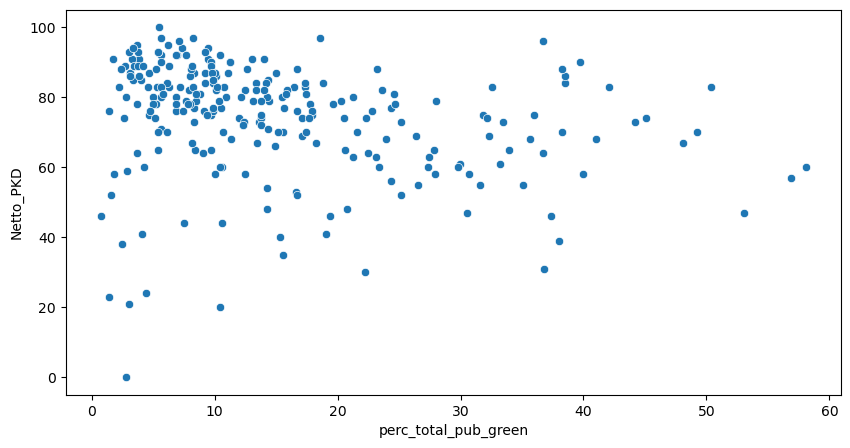

In [137]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_total_pub_green', y='Netto_PKD', data=dfadeffil, ax=ax);

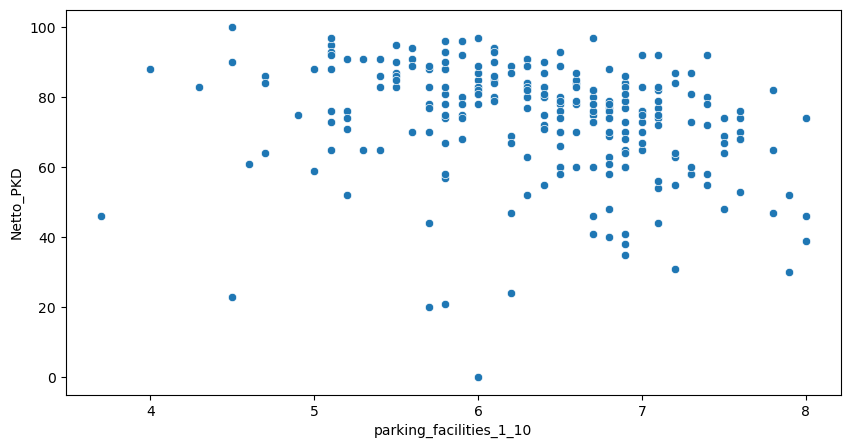

In [138]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='parking_facilities_1_10', y='Netto_PKD', data=dfadeffil, ax=ax);

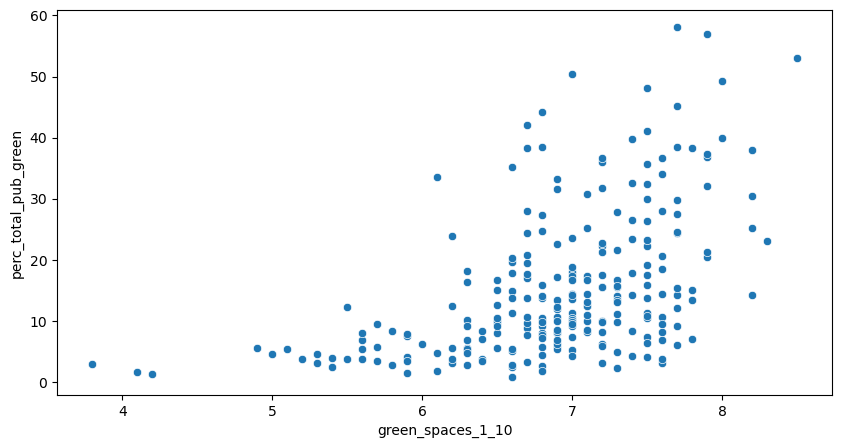

In [139]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='green_spaces_1_10', y='perc_total_pub_green', data=dfadeffil, ax=ax);

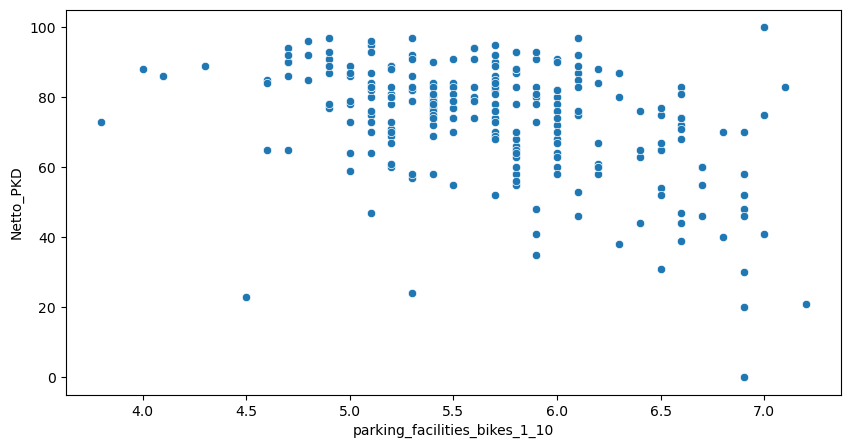

In [140]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='parking_facilities_bikes_1_10', y='Netto_PKD', data=dfadeffil, ax=ax);

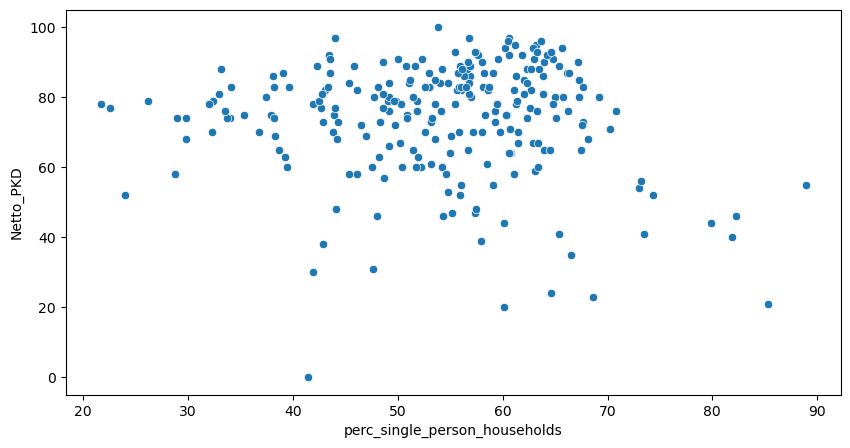

In [141]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_single_person_households', y='Netto_PKD', data=dfadeffil, ax=ax);

In [142]:
## regression with only the entries we kept (248ish)
#preparing the OLS with one regressor
# 1) Add constant
X3 = dfadeffil[['perc_single_person_households']]
X3 = sm.add_constant(X3)
y3 = dfadeffil['Netto_PKD']

# 2) Fit model 
#variable means model simple version 1
msv3 = sm.OLS(y3, X3).fit()

# 3) Inspect results
print(msv3.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.720
Date:                Tue, 04 Nov 2025   Prob (F-statistic):              0.191
Time:                        00:18:28   Log-Likelihood:                -1040.6
No. Observations:                 248   AIC:                             2085.
Df Residuals:                     246   BIC:                             2092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [143]:
## regression with only the entries we kept (248ish)
#preparing the OLS with one regressor
# 1) Add constant
X4 = dfadeffil[['parking_facilities_bikes_1_10']]
X4 = sm.add_constant(X4)
y4 = dfadeffil['perc_total_pub_green']

# 2) Fit model 
#variable means model simple version 1
msv4 = sm.OLS(y4, X4).fit()

# 3) Inspect results
print(msv4.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_total_pub_green   R-squared:                       0.017
Model:                              OLS   Adj. R-squared:                  0.013
Method:                   Least Squares   F-statistic:                     4.261
Date:                  Tue, 04 Nov 2025   Prob (F-statistic):             0.0400
Time:                          00:25:16   Log-Likelihood:                -962.52
No. Observations:                   248   AIC:                             1929.
Df Residuals:                       246   BIC:                             1936.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

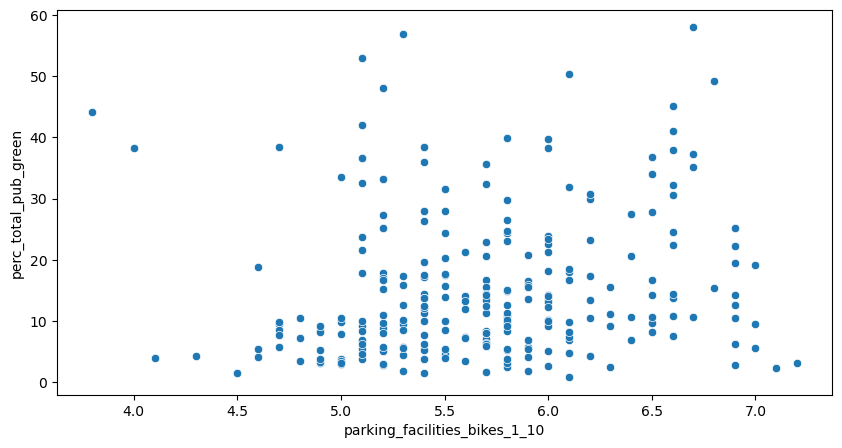

In [144]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='parking_facilities_bikes_1_10', y='perc_total_pub_green', data=dfadeffil, ax=ax);

In [145]:
#exporting the cleansed file to merge with new data base 
dfadeffil.to_csv('holy_grial_cld.csv', index=False)

In [7]:
candidates = [
    'parking_facilities_bikes_1_10',
    'perc_single_person_households',
    'parking_facilities_1_10',
    'green_spaces_1_10',
    'perc_built_area',
    'perc_built_envmt',
    'perc_public_green',
    'urbtn_indx_km2',
    'pop_dnsty_km2'
]
dfadeffil[candidates + ['perc_total_pub_green', 'Netto_PKD']].corr()

,parking_facilities_bikes_1_10,perc_single_person_households,parking_facilities_1_10,green_spaces_1_10,perc_built_area,perc_built_envmt,perc_public_green,urbtn_indx_km2,pop_dnsty_km2,perc_total_pub_green,Netto_PKD
parking_facilities_bikes_1_10,1.000000,-0.019380,0.410525,0.374225,-0.142313,-0.389529,0.154265,0.013311,-0.396762,0.130487,-0.423732
perc_single_person_households,-0.019380,1.000000,-0.245273,-0.261343,0.138229,0.314071,-0.234965,-0.308596,0.269616,-0.208759,-0.083328
parking_facilities_1_10,0.410525,-0.245273,1.000000,0.560234,-0.042240,-0.367580,0.173503,-0.112188,-0.156056,0.255622,-0.246011
green_spaces_1_10,0.374225,-0.261343,0.560234,1.000000,0.042370,-0.450770,0.391871,0.002190,-0.194602,0.496996,-0.114374
perc_built_area,-0.142313,0.138229,-0.042240,0.042370,1.000000,0.384484,-0.079126,-0.234575,0.230289,0.038309,0.208603
perc_built_envmt,-0.389529,0.314071,-0.367580,-0.450770,0.384484,1.000000,-0.716990,-0.288470,0.677580,-0.647622,0.441664
perc_public_green,0.154265,-0.234965,0.173503,0.391871,-0.079126,-0.716990,1.000000,0.345361,-0.586482,0.850536,-0.257666
urbtn_indx_km2,0.013311,-0.308596,-0.112188,0.002190,-0.234575,-0.288470,0.345361,1.000000,-0.322038,0.248391,-0.099225
pop_dnsty_km2,-0.396762,0.269616,-0.156056,-0.194602,0.230289,0.677580,-0.586482,-0.322038,1.000000,-0.497912,0.568502
perc_total_pub_green,0.130487,-0.208759,0.255622,0.496996,0.038309,-0.647622,0.850536,0.248391,-0.497912,1.000000,-0.226636


In [ ]:
#previous cell allows uf to better select independent variables to compare our dependent variables against

In [ ]:
#following plot allows to identify it would be better to run logaritmic regressions

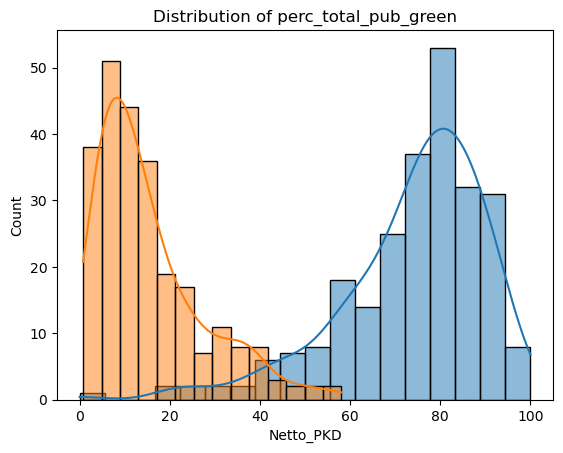

In [150]:
sns.histplot(dfadeffil['Netto_PKD'], kde=True)
plt.title("Distribution of Netto_PKD")

sns.histplot(dfadeffil['perc_total_pub_green'], kde=True)
plt.title("Distribution of perc_total_pub_green")
plt.show()

In [149]:
#running the multiple regression for Total Public Green and all the variables
#the accronym means "features multiple regression almost def version 2"
fmrad_v3 = ['green_spaces_1_10',
            'perc_built_envmt',
            'pop_dnsty_km2',
            'Netto_PKD'].copy()
X_multi6 = sm.add_constant(dfadeffil[fmrad_v3])
y6 = dfadeffil['perc_total_pub_green']

model_multi6 = sm.OLS(y6, X_multi6).fit()
print(model_multi6.summary())

                             OLS Regression Results                             
Dep. Variable:     perc_total_pub_green   R-squared:                       0.496
Model:                              OLS   Adj. R-squared:                  0.488
Method:                   Least Squares   F-statistic:                     59.90
Date:                  Tue, 04 Nov 2025   Prob (F-statistic):           3.82e-35
Time:                          01:01:03   Log-Likelihood:                -879.56
No. Observations:                   248   AIC:                             1769.
Df Residuals:                       243   BIC:                             1787.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [153]:
# Filter strictly positive rows for logs
df_pos1 = dfadeffil[(dfadeffil['Netto_PKD'] > 0)
    & (dfadeffil['green_spaces_1_10'] > 0)
    & (dfadeffil['perc_built_envmt'] > 0)
    & (dfadeffil['pop_dnsty_km2'] > 0)
    & (dfadeffil['perc_total_pub_green'] > 0)].copy()
df_pos1['ln_Netto_PKD'] = np.log(df_pos1['Netto_PKD'])
df_pos1['ln_green_spaces_1_10'] = np.log(df_pos1['green_spaces_1_10'])
df_pos1['ln_perc_built_envmt']  = np.log(df_pos1['perc_built_envmt'])
df_pos1['ln_pop_dnsty_km2']  = np.log(df_pos1['pop_dnsty_km2'])
df_pos1['ln_perc_total_pub_green']  = np.log(df_pos1['perc_total_pub_green'])


X1_log = sm.add_constant(df_pos1[['ln_Netto_PKD', 'ln_green_spaces_1_10', 'ln_perc_built_envmt', 'ln_pop_dnsty_km2']])
y1_log = df_pos1['ln_perc_total_pub_green']
model1_log = sm.OLS(y1_log, X1_log).fit()
print(model1_log.summary())

                               OLS Regression Results                              
Dep. Variable:     ln_perc_total_pub_green   R-squared:                       0.492
Model:                                 OLS   Adj. R-squared:                  0.484
Method:                      Least Squares   F-statistic:                     58.61
Date:                     Tue, 04 Nov 2025   Prob (F-statistic):           1.54e-34
Time:                             01:42:09   Log-Likelihood:                -216.32
No. Observations:                      247   AIC:                             442.6
Df Residuals:                          242   BIC:                             460.2
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

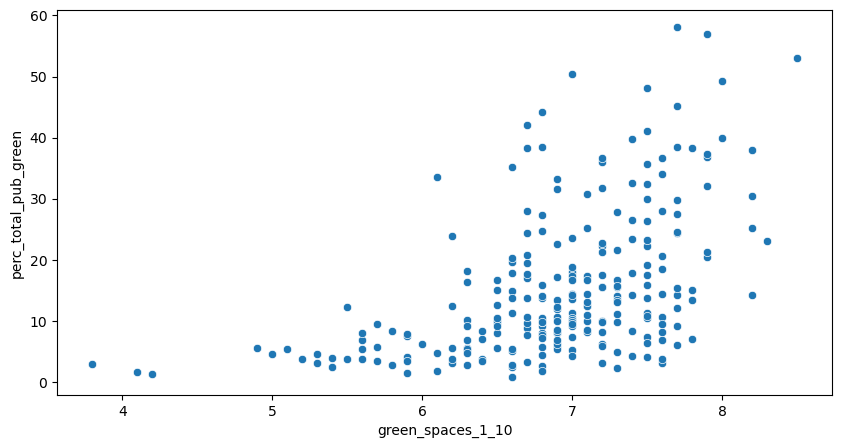

In [8]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='green_spaces_1_10', y='perc_total_pub_green', data=dfadeffil, ax=ax);

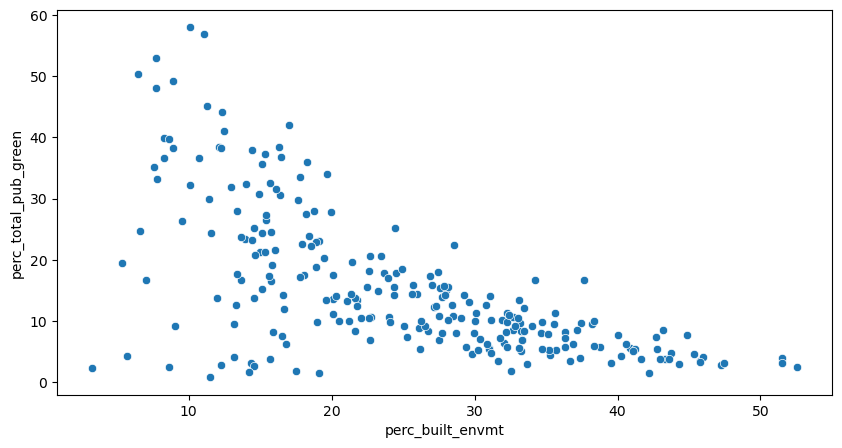

In [9]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_built_envmt', y='perc_total_pub_green', data=dfadeffil, ax=ax);

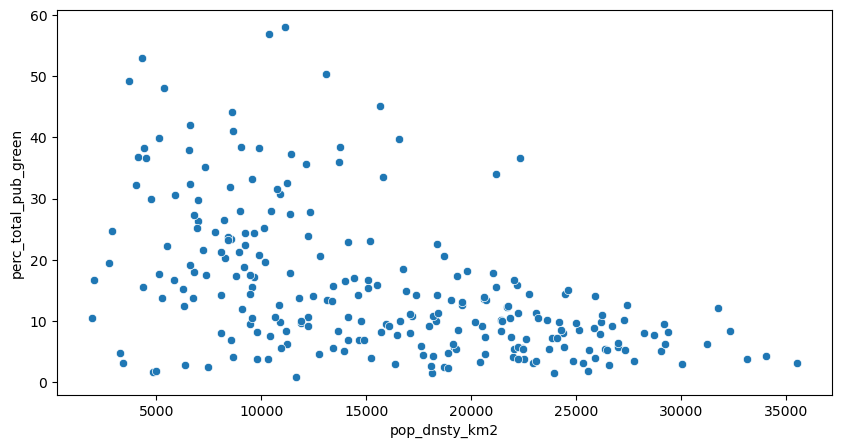

In [10]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='pop_dnsty_km2', y='perc_total_pub_green', data=dfadeffil, ax=ax);

In [151]:
#running the multiple regression for Total Public Green and all the variables
#the accronym means "features multiple regression almost def version 2"
fmrad_v4 = ['parking_facilities_bikes_1_10',
            'perc_built_envmt',
            'pop_dnsty_km2',
            'perc_total_pub_green'].copy()
X_multi7 = sm.add_constant(dfadeffil[fmrad_v4])
y7 = dfadeffil['Netto_PKD']

model_multi7 = sm.OLS(y7, X_multi7).fit()
print(model_multi7.summary())

                            OLS Regression Results                            
Dep. Variable:              Netto_PKD   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     36.82
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           4.67e-24
Time:                        01:19:34   Log-Likelihood:                -982.66
No. Observations:                 248   AIC:                             1975.
Df Residuals:                     243   BIC:                             1993.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [152]:
# Filter strictly positive rows for logs
df_pos2 = dfadeffil[(dfadeffil['Netto_PKD'] > 0)
    & (dfadeffil['parking_facilities_bikes_1_10'] > 0)
    & (dfadeffil['perc_built_envmt'] > 0)
    & (dfadeffil['pop_dnsty_km2'] > 0)
    & (dfadeffil['perc_total_pub_green'] > 0)].copy()
df_pos2['ln_Netto_PKD'] = np.log(df_pos2['Netto_PKD'])
df_pos2['ln_parking_facilities_bikes_1_10'] = np.log(df_pos2['parking_facilities_bikes_1_10'])
df_pos2['ln_perc_built_envmt']  = np.log(df_pos2['perc_built_envmt'])
df_pos2['ln_pop_dnsty_km2']  = np.log(df_pos2['pop_dnsty_km2'])
df_pos2['ln_perc_total_pub_green']  = np.log(df_pos2['perc_total_pub_green'])


X2_log = sm.add_constant(df_pos2[['ln_parking_facilities_bikes_1_10', 'ln_perc_built_envmt', 'ln_pop_dnsty_km2', 'ln_perc_total_pub_green']])
y2_log = df_pos2['ln_Netto_PKD']
model2_log = sm.OLS(y2_log, X2_log).fit()
print(model2_log.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_Netto_PKD   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     33.90
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.85e-22
Time:                        01:34:31   Log-Likelihood:                 34.207
No. Observations:                 247   AIC:                            -58.41
Df Residuals:                     242   BIC:                            -40.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

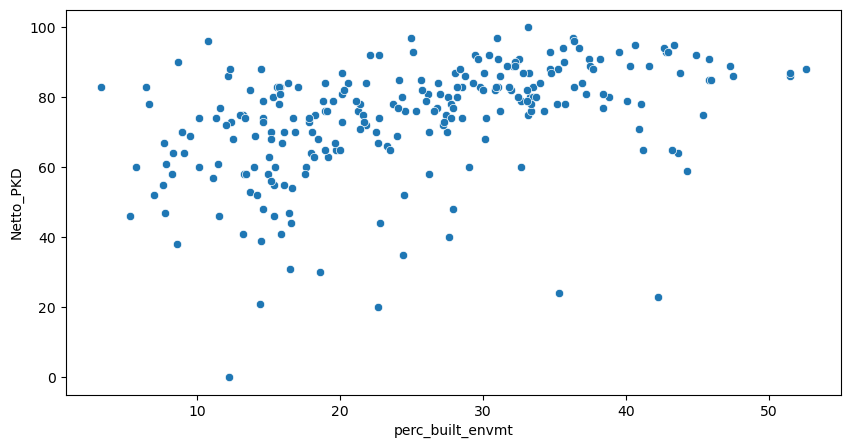

In [11]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='perc_built_envmt', y='Netto_PKD', data=dfadeffil, ax=ax);

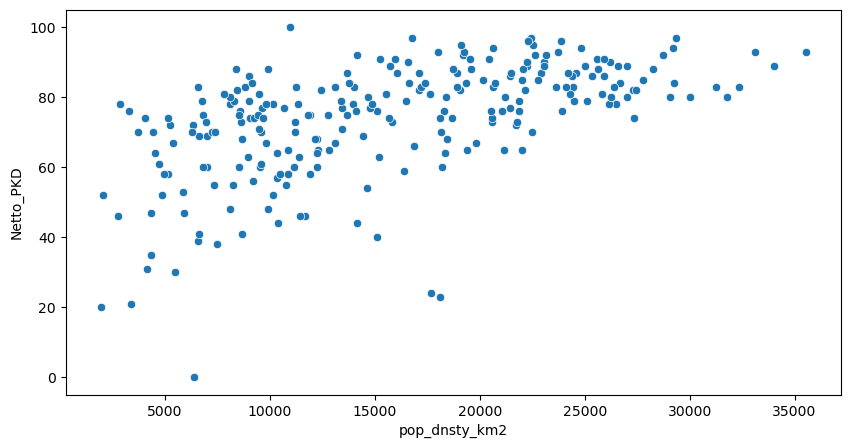

In [12]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='pop_dnsty_km2', y='Netto_PKD', data=dfadeffil, ax=ax);

In [ ]:
# #Scatterplot:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x='pop_dnsty_km2', y='Netto_PKD', data=dfadeffil, ax=ax);

In [ ]:
#just for test porpuses